In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import os
import subprocess

import random as random
import scipy.stats as stats
from statsmodels.stats.proportion import proportion_confint

from collections import Counter



In [2]:
def get_derivative_growth_rate(well, df, tmax=25):
    # well : a tuple of the format (row, col)
    # source : DataFrame where well was measured
    # tmax : defines the interval in which the function will measure the growth rate, from t=0 to t=tmax
    
    df_cols = [ x for x in list(df.index) if x<=tmax]
    # define time range in which to look for max growth rate
    
    df_data = df.loc[df_cols]
    # select the time interval
    data = df_data[(well[0]+str(well[1]))]
    # select the well

    data_diff = data.diff()*4
    # get an array of the differences between timepoints (see pd.DataFrame.diff())
    # multiply by 4 to get OD/hour instead of OD/15 mins
    
    get_top_5 = data_diff.nlargest(5)
    # get the 5 largest derivatives
    
    growth_rate = np.median(get_top_5)
    std_err = np.std(get_top_5)
    # get the median of the top five timepoints and the standard error.
    # the standard error is usually used more for debugging
    
    return growth_rate, std_err
    # return the computed values

In [3]:
def format_table(imported_df):
    
    rename_dict = {}


    for col_name in imported_df.columns:
        to_hours = np.float64(col_name.strip('s'))/(60*60)
        rename_dict[col_name] = to_hours
    
    imported_df.rename(columns = rename_dict, inplace=True)

In [4]:
def get_growth_rate_dict(df):
    
    growth_rate_dict = {}
    
    for well in list(df.columns):
    
        row = well[0]
        col = int(well[1:])

        growth_rate = get_derivative_growth_rate((row, col), df, tmax=21)

        growth_rate_dict[well] = growth_rate[0]
        
    return growth_rate_dict
            

In [5]:
mass_mol_FC = 129.09
mass_mol_CY = 111.01

def convert_to_uM(ug, mass_mol):
    
    mass = ug
    
    vol = 0.001
    
    uM = (((mass*10**-6)/(vol*mass_mol))*10**6)
    
    return uM

In [6]:
hap_growth_rates = pd.read_csv('./data/hap_validation_growth_rates.csv', sep=',', index_col=0)

hap_growth_rates

,well,mat_a_pos,mutant_a,FC_100_a,CY_200_a,CY_20_a,mutant_alpha,FC_100_alpha,CY_200_alpha,CY_20_alpha,FC_score_IC50_a,FC_score_IC50_alpha,FC_score_100_a,FC_score_100_alpha,type_pos_a,type_pos_alpha,residue_type
0,A1,A1,NaN,NaN,NaN,NaN,G14*,0.10480,0.00352,0.00932,NaN,0.949734,NaN,0.935475,NaN,unk,NaN
1,B1,B1,R53I,0.09772,0.00380,0.00660,R53I,0.09212,0.00320,0.00740,0.966067,0.966067,0.928732,0.928732,catalytic,catalytic,catalytic
2,C1,C1,R53D,0.10252,0.00348,0.00988,R53D,0.10448,0.00388,0.00912,1.032346,1.032346,1.108824,1.108824,catalytic,catalytic,catalytic
3,D1,D1,H62C,NaN,NaN,NaN,H62C,0.10400,0.00332,0.00740,0.995737,0.995737,1.125737,1.125737,catalytic,catalytic,catalytic
4,E1,E1,E64V,0.10260,0.00324,0.00960,E64V,0.10440,0.00340,0.00628,1.007457,1.007457,1.047183,1.047183,catalytic,catalytic,catalytic
5,F1,F1,E64C,0.10200,0.00412,0.00800,E64C,0.10320,0.00300,0.00772,0.981935,0.981935,1.028532,1.028532,catalytic,catalytic,catalytic
6,G1,G1,E64S,0.10028,0.00448,0.00948,E64S,0.10140,0.00348,0.00728,0.997316,0.997316,1.111080,1.111080,catalytic,catalytic,catalytic
7,H1,H1,R136I,0.08312,0.02112,0.01072,E69L,0.07860,0.00532,0.00660,0.926609,0.946809,0.535743,0.598206,unk,interface,unk
8,A2,A2,G72P,0.09968,0.00412,0.00552,G72P,0.09060,0.00408,0.00728,0.957109,0.957109,0.614988,0.614988,interface,interface,interface
9,B2,B2,R73G,0.08532,0.00444,0.00788,R73G,0.07404,0.00420,0.00784,0.902137,0.902137,0.344910,0.344910,interface,interface,interface


In [15]:
mat_a_plan = pd.read_excel('./data/validations_mat_a_nat.xlsx')
mat_alpha_plan = pd.read_excel('./data/validations_mat_alpha_hph.xlsx')
mat_a_plan

,row,col,strain,number
0,A,1,NaN,NaN
1,B,1,R53I,1.0
2,C,1,R53D,2.0
3,D,1,H62C,3.0
4,E,1,E64V,4.0
...,...,...,...,...
91,D,12,NaN,NaN
92,E,12,NaN,NaN
93,F,12,NaN,NaN
94,G,12,NaN,NaN


In [16]:
mat_alpha_plan

,row,col,strain,number
0,A,1,G14*,1.0
1,B,1,R53I,2.0
2,C,1,R53D,3.0
3,D,1,H62C,4.0
4,E,1,E64V,5.0
...,...,...,...,...
91,D,12,NaN,NaN
92,E,12,NaN,NaN
93,F,12,NaN,NaN
94,G,12,NaN,NaN


In [17]:
array = pd.read_csv('./data/array_LOF.csv', sep=',', index_col=0)

array

,Mata,MatAlpha,well,quadrant,n_96well,n_384well
index,,,,,,
0,Empty,Empty,A1,A,1,1
1,12,23,A1,C,3,1
2,39,31,B1,A,1,1
3,42,43,B1,C,3,1
4,13,22,C1,A,1,1
...,...,...,...,...,...,...
2300,Empty,Empty,F12,D,24,6
2301,Empty,Empty,G12,B,22,6
2302,Empty,Empty,G12,D,24,6


In [18]:
def get_genotype_a(number):
    
    if number == "Empty":
        return np.NaN
    
    else:
        genotype = list(mat_a_plan.iloc[mat_a_plan[mat_a_plan['number']==int(number)].index]['strain'])[0]
        return genotype
    
def get_genotype_alpha(number):
    
    if number == "Empty":
        return np.NaN
    
    else:
        genotype = list(mat_alpha_plan.iloc[mat_alpha_plan[mat_alpha_plan['number']==int(number)].index]['strain'])[0]
        return genotype
    
get_genotype_a('3'), get_genotype_alpha('3')

('H62C', 'R53D')

In [19]:
array['mutant_a'] = array.apply(lambda x: get_genotype_a(x.Mata), axis=1)
array['mutant_alpha'] = array.apply(lambda x: get_genotype_alpha(x.MatAlpha), axis=1)

array['growth_rate'] = np.NaN


array.dtypes

Mata             object
MatAlpha         object
well             object
quadrant         object
n_96well          int64
n_384well         int64
mutant_a         object
mutant_alpha     object
growth_rate     float64
dtype: object

In [20]:
od_file_list = os.listdir('./lofxlof_crosses/')

growth_rate_main_dict = {}
auc_main_dict = {}

for file in od_file_list:
    
    print(file)
    
    df = pd.read_excel('./lofxlof_crosses/'+file, skiprows=[0,2]+[x for x in range(99,133)], index_col=0)
    
    format_table(df)
    
    growth_rate_main_dict[file] = get_growth_rate_dict(df.T)


plate_1_A.xlsx
plate_1_B.xlsx
plate_1_C.xlsx
plate_1_D.xlsx
plate_2_A.xlsx
plate_2_B.xlsx
plate_2_C.xlsx
plate_2_D.xlsx
plate_3_A.xlsx
plate_3_B.xlsx
plate_3_C.xlsx
plate_3_D.xlsx
plate_4_A.xlsx
plate_4_B.xlsx
plate_4_C.xlsx
plate_4_D.xlsx
plate_5_A.xlsx
plate_5_B.xlsx
plate_5_C.xlsx
plate_5_D.xlsx
plate_6_A.xlsx
plate_6_B.xlsx


In [21]:
for file in od_file_list:
    
    file_form = file.strip('plate_').strip('.xlsx')
    n_384, quadrant = int(file_form.split('_')[0]), file_form.split('_')[1]
       
    for well in list(growth_rate_main_dict[file].keys()):
        
        index_val = array[(array['well'] == well) & (array['quadrant'] == quadrant) & (array['n_384well'] == n_384) ].index[0]
        
        growth_rate = growth_rate_main_dict[file][well]
        
        array.at[index_val, 'growth_rate'] = growth_rate
    
    
    

In [22]:
empty_wells = array[array['Mata'].isin(['Empty', '43']) | (array['MatAlpha'].isin(['Empty']))]
#empty_wells

In [23]:
array = array[~array['Mata'].isin(['43', '3', 'Empty'])]

array = array[~array['MatAlpha'].isin(['Empty'])]


#array

In [24]:
empty_rows = [x for x in list(array.mutant_a.unique()) if x not in list(array.mutant_alpha.unique())]
empty_rows

['E135D']

In [25]:
empty_cols = [x for x in list(array.mutant_alpha.unique()) if x not in list(array.mutant_a.unique())]
empty_cols

['D134C', 'I65F', 'G76H', 'H62C', 'wt', 'L74P', 'G14*', 'G76Y', 'C71Y']

## Examine the growth curve of N39F-R136I (outlier)

In [26]:
df = pd.read_excel('./lofxlof_crosses/plate_6_B.xlsx', skiprows=[0,2]+[x for x in range(99,133)], index_col=0)
    
format_table(df)

outlier_df = df.T


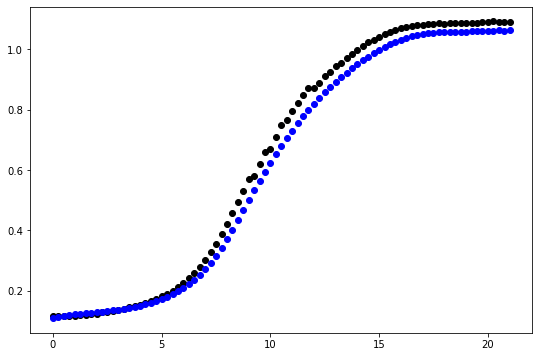

In [27]:
plt.figure(figsize = (9,6))

plt.plot(outlier_df['D6'], 'ko')
# outlier strain

plt.plot(outlier_df['H3'], 'bo')
# another strain with the same Mata parent (N39F-Y101H) 


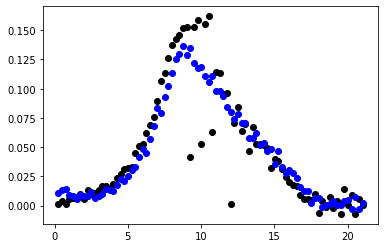

In [28]:
plt.plot(outlier_df['D6'].diff()*4, 'ko')
plt.plot(outlier_df['H3'].diff()*4, 'bo')
# look at in growth rate distributions
# the distribution is clearly off, will exclude this data point as an outlier

In [29]:
array.at[2103, 'growth_rate'] = np.NaN

In [30]:
array.loc[2103]

Mata               28
MatAlpha           23
well               D6
quadrant            B
n_96well           22
n_384well           6
mutant_a         N39F
mutant_alpha    R136I
growth_rate       NaN
Name: 2103, dtype: object

In [31]:
plates_wvals = array[~array['growth_rate'].isnull()].n_96well.unique()

<AxesSubplot:xlabel='growth_rate', ylabel='Density'>

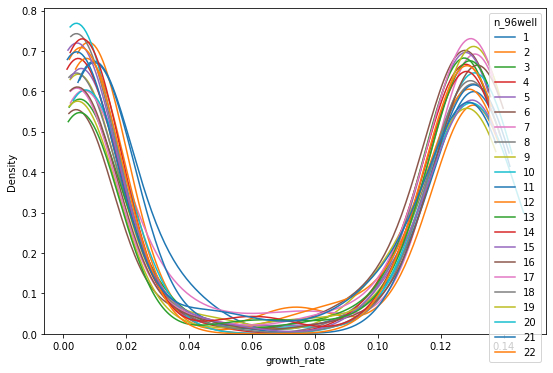

In [32]:
plt.figure(figsize = (9,6))

sns.kdeplot(data=array[array['n_96well'].isin(plates_wvals)], x='growth_rate', hue='n_96well', cut=0, palette = 'tab10', bw_adjust=0.5)

In [33]:
array.drop(515, inplace=True)
# drop strain M93G/M93G, which was found to be contaminated via Sanger sequencing

In [34]:
heatmap_df = array.pivot_table(index = 'mutant_alpha', columns='mutant_a', values = 'growth_rate')



In [35]:
for col in empty_cols:
    
    heatmap_df[col]=np.NaN
    
for row in empty_rows:
    
    heatmap_df.loc[row] = np.NaN
    


In [36]:
mutant_order = ['wt', 'delta', #ctrl
                'A23N', 'N39F', 'S66M', 'C71A', 'L74Q', 'E75R', 'S89V', 'I98L', 'T124Y', 'D134C', 'G29Q', 'E135D', # wt-like
                'L61F', 'I65F', 'G76H', 'G76M', 'G76Y', 'Y79K', # partial lof
                'G14*', 'A59H', 'T60F', 'T60R', 'E69V', 'C71Y', 'Y79E', 'Y79H', 'C94D', 'Y101H', 'R136I', # nonsense-like
                'R53D', 'R53I', 'H62C', 'E64C', 'E64S', 'E64V', 'E69L', 'G72P', 'R73G', 'L74P', 'Y79S', 'M93G', 
                'A97F', 'M100W', 'F153*', 'D155A', 'D155S', 'I156P'  # complementing mutant
               ]

len(mutant_order)

49

In [37]:
colors=sns.color_palette("hls", 3)
mut_colors = {'WT-like':colors[1], 'Nonsense-like':'#d41159', 'Front minima':colors[2], 'nan': 'grey'}

Text(141.0, 0.5, 'MATa strain')

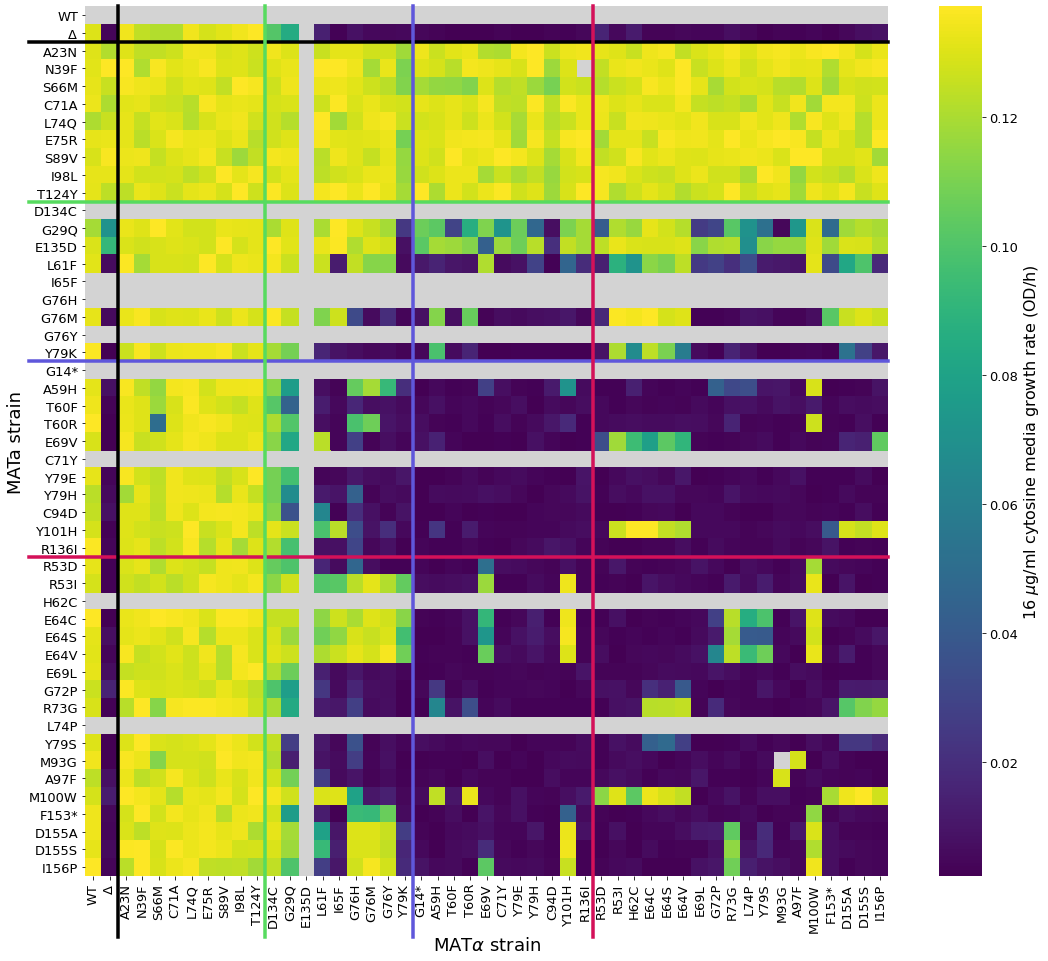

In [39]:
plt.figure(figsize = (18,16))

g = sns.heatmap(heatmap_df.T.loc[mutant_order][mutant_order], cmap='viridis', robust=True, cbar_kws={'label':'16 $\mu$g/ml cytosine media growth rate (OD/h)'})
g.figure.axes[-1].yaxis.label.set_size(16)
g.figure.axes[-1].tick_params(labelsize=13)

g.set_facecolor('lightgrey')

plt.xticks([x+0.5 for x in range(0,49)],     ['WT',  r'$\Delta$', #ctrl
                            'A23N', 'N39F', 'S66M', 'C71A', 'L74Q', 'E75R', 'S89V', 'I98L', 'T124Y', 'D134C', 'G29Q', 'E135D', # wt-like
                            'L61F', 'I65F', 'G76H', 'G76M', 'G76Y', 'Y79K', # partial lof
                            'G14*', 'A59H', 'T60F', 'T60R', 'E69V', 'C71Y', 'Y79E', 'Y79H', 'C94D', 'Y101H', 'R136I', # nonsense-like
                            'R53D', 'R53I', 'H62C', 'E64C', 'E64S', 'E64V', 'E69L', 'G72P', 'R73G', 'L74P', 'Y79S', 'M93G', 
                            'A97F', 'M100W', 'F153*', 'D155A', 'D155S', 'I156P',
                             ], fontsize=13) # complementing mutants

plt.yticks([x+0.5 for x in range(0,49)],     ['WT',  r'$\Delta$',#ctrl
                            'A23N', 'N39F', 'S66M', 'C71A', 'L74Q', 'E75R', 'S89V', 'I98L', 'T124Y', 'D134C', 'G29Q', 'E135D', # wt-like
                            'L61F', 'I65F', 'G76H', 'G76M', 'G76Y', 'Y79K', # partial lof
                            'G14*', 'A59H', 'T60F', 'T60R', 'E69V', 'C71Y', 'Y79E', 'Y79H', 'C94D', 'Y101H', 'R136I', # nonsense-like
                            'R53D', 'R53I', 'H62C', 'E64C', 'E64S', 'E64V', 'E69L', 'G72P', 'R73G', 'L74P', 'Y79S', 'M93G', 
                            'A97F', 'M100W', 'F153*', 'D155A', 'D155S', 'I156P',
                            ], fontsize=13) # complementing mutants


plt.axhline(2, -0.07, 1.0, clip_on =False, color='black', linewidth =3.5)
plt.axhline(11, -0.07, 1.0, clip_on =False, color= mut_colors['WT-like'], linewidth =3.5)
plt.axhline(20, -0.07, 1.0, clip_on =False, color= mut_colors['Front minima'], linewidth =3.5)
plt.axhline(31, -0.07, 1.0, clip_on =False, color= mut_colors['Nonsense-like'], linewidth =3.5)

plt.axvline(2, -0.07, 1.0, clip_on =False, color='black', linewidth =3.5)
plt.axvline(11, -0.07, 1.0, clip_on =False, color= mut_colors['WT-like'], linewidth =3.5)
plt.axvline(20, -0.07, 1.0, clip_on =False, color= mut_colors['Front minima'], linewidth =3.5)
plt.axvline(31, -0.07, 1.0, clip_on =False, color= mut_colors['Nonsense-like'], linewidth =3.5)

plt.xlabel(r'MAT$\alpha$ strain', fontsize=18)
plt.ylabel(r'MATa strain', fontsize=18)

#plt.savefig('./validations_all_by_all.svg', format='svg', dpi=300)

In [32]:
mat_a_alpha = []
mat_alpha_a = []

mut_covered = []
mut_covered_alpha = []


for x in range(0,49):
    
    for y in range(0,49):
        
        mutant_a = mutant_order[x]
        mutant_alpha = mutant_order[y]
        
        growth_rate_a_alpha = heatmap_df.T.at[mutant_a, mutant_alpha]
        
        growth_rate_alpha_a = heatmap_df.T.at[mutant_alpha, mutant_a]
        
        if np.isnan(growth_rate_a_alpha)==False and np.isnan(growth_rate_alpha_a) == False and mutant_a != mutant_alpha:
            
            pair = '_'.join(sorted([mutant_a, mutant_alpha]))
            
            
            if pair not in mut_covered:
            
                mat_a_alpha.append(growth_rate_a_alpha)
                mat_alpha_a.append(growth_rate_alpha_a)
                
                if abs(growth_rate_a_alpha-growth_rate_alpha_a) > 0.02:
                    print(mutant_a, mutant_alpha, growth_rate_a_alpha, growth_rate_alpha_a)
                
                mut_covered.append(pair)
            
        
len(mat_a_alpha), len(mat_alpha_a)

N39F Y79K 0.11036000000000001 0.13588
N39F F153* 0.12112000000000012 0.14260000000000006
S66M T60R 0.1115999999999997 0.049719999999999986
E75R Y79K 0.10911999999999988 0.13388
S89V Y79K 0.1157999999999999 0.13592000000000004
G29Q Y79K 0.02400000000000002 0.10880000000000001
G29Q A59H 0.10340000000000016 0.07632000000000017
G29Q E69V 0.11107999999999985 0.08272000000000013
G29Q Y79H 0.046680000000000055 0.06747999999999976
G29Q C94D 0.007120000000000015 0.03648000000000007
G29Q R136I 0.11912000000000011 0.09728000000000003
G29Q R53D 0.041120000000000045 0.09939999999999971
G29Q E69L 0.025680000000000147 0.1071200000000001
G29Q G72P 0.030000000000000027 0.07723999999999975
G29Q Y79S 0.05160000000000009 0.0262
G29Q A97F 0.07392000000000021 0.10851999999999995
G29Q F153* 0.04899999999999971 0.07611999999999997
L61F C94D 0.0030000000000000027 0.06428000000000011
L61F Y101H 0.04587999999999992 0.09855999999999998
Y79K A59H 0.0984799999999999 0.020199999999999996
Y79K E64V 0.0583199999999999

(740, 740)

(array([-0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,
         0.16,  0.18]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

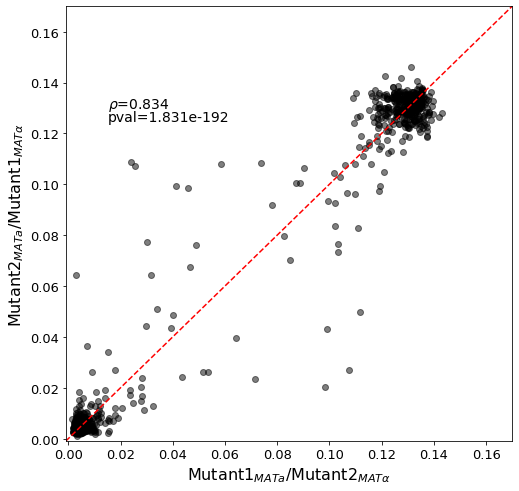

In [33]:
plt.figure(figsize = (8,8))

plt.scatter(mat_a_alpha, mat_alpha_a, color = 'k', alpha=0.5)

plt.xlim(-0.001, 0.17)
plt.ylim(-0.001, 0.17)


plt.plot([-0.001, 0.17],[-0.001, 0.17], 'r--')

vals = stats.spearmanr(mat_a_alpha, mat_alpha_a)

plt.text(0.015,0.13, r'$\rho$='+str(np.round(vals[0], 3)), fontsize=14)
plt.text(0.015,0.125, 'pval='+str(np.format_float_scientific(vals[1],3)), fontsize=14)

plt.xlabel(r'Mutant1$_{MATa}$/Mutant2$_{MAT\alpha}$', fontsize=16)
plt.ylabel(r'Mutant2$_{MATa}$/Mutant1$_{MAT\alpha}$', fontsize=16)

#plt.axvline(0.01)
#plt.axhline(0.01)

#plt.axvline(0.122)
#plt.axhline(0.122)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


#plt.boxplot(x = heatmap_df.T['wt'].dropna(), vert=False, positions=[0.15], widths=[0.01], notch=True)

In [34]:
len(mat_a_alpha)
len(mat_alpha_a)

740

In [36]:
lof_mutants = [x for x in mutant_order if x not in ['wt', 'delta','A23N', 'G29Q', 'N39F', 'S66M', 'C71A', 'L74Q', 'E75R', 'S89V', 'I98L', 'T124Y', 'D134C', 'E135D']]
               
delta_lof = (list(heatmap_df.T.loc[lof_mutants]['delta'])+list(heatmap_df.loc[lof_mutants]['delta']))
delta_lof.append(heatmap_df.at['delta', 'delta'])



[0.006280000000000063, nan, nan, 0.005699999999999983, nan, 0.0023000000000000242, nan, 0.008000000000000007, 0.0033999999999999864, 0.002599999999999991, 0.0026800000000000157, nan, 0.0040000000000000036, 0.005599999999999994, 0.007799999999999974, 0.0031999999999999806, 0.0043199999999999905, 0.0028799999999999937, 0.0030000000000000027, nan, 0.00276000000000004, 0.007280000000000009, 0.0040000000000000036, 0.00651999999999997, 0.015199999999999991, 0.0033199999999999896, nan, 0.0026000000000000467, 0.0028000000000000247, 0.008080000000000032, 0.012639999999999985, 0.004679999999999962, 0.0040000000000000036, 0.005520000000000025, 0.0041999999999999815, 0.013919999999999932, 0.0029200000000000337, 0.008099999999999996, 0.005099999999999993, 0.0046800000000000175, 0.005319999999999991, 0.004699999999999982, 0.0033999999999999586, 0.0021999999999999797, 0.0017599999999999838, 0.0024000000000000132, 0.003720000000000001, 0.002599999999999991, 0.0025800000000000267, 0.0034800000000000386

In [39]:
single_col_seq_df = pd.read_csv('./indep_crosses.csv', sep=',', index_col=0)

single_col_seq_df

,allele_1,allele_2,n_observed,n_indep_crosses,freq_predicted
0,E64V,Y79S,24,17,-15.447429
1,E64L,Y79S,16,15,-15.597398
2,E64A,R73D,16,15,-17.132326
3,E69L,H62C,15,13,-16.157550
4,E64L,R73G,19,13,-16.486246
...,...,...,...,...,...
202,A97H,E64L,1,1,-15.629399
203,A59W,Y79S,1,1,-17.490721
204,A59V_I156P,R73G,1,1,NaN
205,A59E,M100W_E158K,1,1,NaN


In [40]:
for pair in single_col_seq_df.index:
    
    if single_col_seq_df.loc[pair]['allele_1'] in mutant_order:
        
        if single_col_seq_df.loc[pair]['allele_2'] in mutant_order:
        
            print (pair)

0
3
7
12
13
15
21
24
31
32
35
42
54
64
65
68
71
77
79
113
118
124
131
165
179
195
196


In [41]:
validation_set = [ 'R53D', 'R53I', 'H62C', 'E64C', 'E64S', 'E64V', 'E69L', 'G72P', 'R73G', 'L74P', 'Y79S', 'M93G', 
                  'A97F', 'M100W', 'F153*', 'D155A', 'D155S', 'I156P']

print(len(validation_set))


allele_1_dict = {}
allele_2_dict = {}
pair_growth_rate_dict_r1 = {}
pair_growth_rate_dict_r2 = {}
in_validation = {}

pair_list = []


index = 0



for mutant_1 in validation_set:
    
    for mutant_2 in validation_set:
        
        pair = tuple(sorted((mutant_1, mutant_2)))
        
        if pair not in pair_list:
        
            pair_list.append(pair)
            
            allele_1_dict[index] = pair[0]
            allele_2_dict[index] = pair[1]
            
            pair_growth_rate_dict_r1[index] = heatmap_df.loc[pair[0]][pair[1]]
            pair_growth_rate_dict_r2[index] = heatmap_df.loc[pair[1]][pair[0]]
            
            
            
            #print(pair)        
        
            index+=1
        
validation_pairs_df = pd.DataFrame([pd.Series(allele_1_dict, name='allele_1'), pd.Series(allele_2_dict, name = 'allele_2'), 
                                    pd.Series(pair_growth_rate_dict_r1, name='growth_rate_r1'), pd.Series(pair_growth_rate_dict_r2, name='growth_rate_r2')]).T

validation_pairs_df['mean_growth_rate'] = validation_pairs_df[['growth_rate_r1','growth_rate_r2']].mean(axis=1)

validation_pairs_df

18


,allele_1,allele_2,growth_rate_r1,growth_rate_r2,mean_growth_rate
0,R53D,R53D,0.00384,0.00384,0.00384
1,R53D,R53I,0.00332,0.01032,0.00682
2,H62C,R53D,0.0038,NaN,0.00380
3,E64C,R53D,0.003,0.00292,0.00296
4,E64S,R53D,0.00364,0.00472,0.00418
...,...,...,...,...,...
166,D155A,D155S,0.0059,0.00352,0.00471
167,D155A,I156P,0.00308,0.00288,0.00298
168,D155S,D155S,0.00468,0.00468,0.00468
169,D155S,I156P,0.00448,0.0041,0.00429


In [44]:
in_single_col = {}
n_indep_crosses_dict = {}
expected_freq = {}

for index in validation_pairs_df.index:
    
    allele_1, allele_2 = validation_pairs_df.loc[index]['allele_1'],validation_pairs_df.loc[index]['allele_2']
    
    
    if len(single_col_seq_df[(single_col_seq_df['allele_1']==allele_1) & (single_col_seq_df['allele_2']==allele_2)])>0:
        
        single_col_index = single_col_seq_df[(single_col_seq_df['allele_1']==allele_1) & (single_col_seq_df['allele_2']==allele_2)].index
        
        in_single_col[index] = 'yes'
        
        n_indep_crosses_dict[index] = int(single_col_seq_df.loc[single_col_index]['n_indep_crosses'])
        expected_freq[index] = float(single_col_seq_df.loc[single_col_index]['freq_predicted'])
        
    else:
        
        in_single_col[index] = 'no'
        n_indep_crosses_dict[index] = np.NaN
        
        
validation_pairs_df['in_single_col_seq'] = pd.Series(in_single_col)
validation_pairs_df['n_indep_crosses'] = pd.Series(n_indep_crosses_dict)
validation_pairs_df['expected_freq'] = pd.Series(expected_freq)

validation_pairs_df

,allele_1,allele_2,growth_rate_r1,growth_rate_r2,mean_growth_rate,in_single_col_seq,n_indep_crosses,expected_freq
0,R53D,R53D,0.00384,0.00384,0.00384,no,NaN,NaN
1,R53D,R53I,0.00332,0.01032,0.00682,no,NaN,NaN
2,H62C,R53D,0.0038,NaN,0.00380,no,NaN,NaN
3,E64C,R53D,0.003,0.00292,0.00296,no,NaN,NaN
4,E64S,R53D,0.00364,0.00472,0.00418,no,NaN,NaN
...,...,...,...,...,...,...,...,...
166,D155A,D155S,0.0059,0.00352,0.00471,no,NaN,NaN
167,D155A,I156P,0.00308,0.00288,0.00298,no,NaN,NaN
168,D155S,D155S,0.00468,0.00468,0.00468,no,NaN,NaN
169,D155S,I156P,0.00448,0.0041,0.00429,no,NaN,NaN


In [46]:
len(validation_pairs_df[(validation_pairs_df['in_single_col_seq']=='yes') & (validation_pairs_df['mean_growth_rate'] >= 0.02)])
# True positives

24

In [47]:
validation_pairs_df[(validation_pairs_df['in_single_col_seq']=='yes') & (validation_pairs_df['mean_growth_rate'] < 0.02)]


,allele_1,allele_2,growth_rate_r1,growth_rate_r2,mean_growth_rate,in_single_col_seq,n_indep_crosses,expected_freq
39,E69L,H62C,NaN,0.0038,0.00380,yes,13.0,-16.157550
43,H62C,Y79S,0.00636,NaN,0.00636,yes,1.0,-16.847469
127,L74P,Y79S,0.0062,NaN,0.00620,yes,1.0,-18.747567


In [48]:
len(validation_pairs_df[(validation_pairs_df['in_single_col_seq']=='yes') & (validation_pairs_df['mean_growth_rate'] < 0.02)])
# False positives

3

In [49]:
validation_pairs_df[(validation_pairs_df['in_single_col_seq']=='no') & (validation_pairs_df['mean_growth_rate'] >= 0.02)]


,allele_1,allele_2,growth_rate_r1,growth_rate_r2,mean_growth_rate,in_single_col_seq,n_indep_crosses,expected_freq
13,M100W,R53D,0.11888,0.1138,0.11634,no,NaN,NaN
61,E64C,M100W,0.1332,0.13072,0.13196,no,NaN,NaN
125,I156P,R73G,0.11608,0.108,0.11204,no,NaN,NaN


In [50]:
len(validation_pairs_df[(validation_pairs_df['in_single_col_seq']=='no') & (validation_pairs_df['mean_growth_rate'] >= 0.02)])
# False negatives

3

In [51]:
len(validation_pairs_df[(validation_pairs_df['in_single_col_seq']=='no') & (validation_pairs_df['mean_growth_rate'] < 0.02)])
# True negatives

137

In [52]:
len(validation_pairs_df[validation_pairs_df['in_single_col_seq']=='yes'])

27

1918


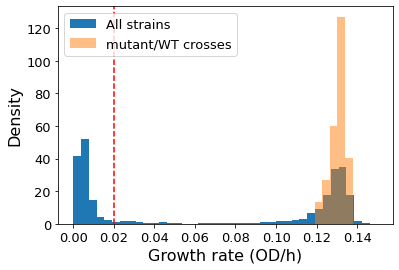

In [53]:
print(len([x for x in heatmap_df.to_numpy().flatten() if np.isnan(x)==False]))

plt.hist([x for x in heatmap_df.to_numpy().flatten() if np.isnan(x)==False], bins=np.linspace(0,0.15, 40), density=True)


plt.hist(heatmap_df.T['wt'].dropna(), density=True, alpha=0.5, bins=5)

plt.xlabel('Growth rate (OD/h)', fontsize=16)
plt.ylabel('Density', fontsize=16)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.legend(['All strains', 'mutant/WT crosses'], fontsize=13, loc='upper left')

plt.axvline(0.02, color='red', linestyle='--')



In [54]:
np.percentile(heatmap_df.T['wt'].dropna(), 5)

0.12288199999999999

In [55]:
18*18/2+18

180.0

In [56]:
validation_set = [ 'R53D', 'R53I', 'H62C', 'E64C', 'E64S', 'E64V', 'E69L', 'G72P', 'R73G', 'L74P', 'Y79S', 'M93G', 
                  'A97F', 'M100W', 'F153*', 'D155A', 'D155S', 'I156P']



allele_1_dict = {}
allele_2_dict = {}
pair_growth_rate_dict_r1 = {}
pair_growth_rate_dict_r2 = {}
in_validation = {}

pair_list = []


index = 0



for mutant_1 in list(heatmap_df.index):
    
    for mutant_2 in list(heatmap_df.columns):
        
        pair = tuple(sorted((mutant_1, mutant_2)))
        
        if pair not in pair_list:
        
            pair_list.append(pair)
            
            allele_1_dict[index] = pair[0]
            allele_2_dict[index] = pair[1]
            
            pair_growth_rate_dict_r1[index] = heatmap_df.loc[pair[0]][pair[1]]
            pair_growth_rate_dict_r2[index] = heatmap_df.loc[pair[1]][pair[0]]
            
            if mutant_1 in validation_set and mutant_2 in validation_set:
                in_validation[index] = 'yes'
                
            else:
                in_validation[index] = 'no'
            
            
            
            #print(pair)        
        
            index+=1
        
all_pairs_df = pd.DataFrame([pd.Series(allele_1_dict, name='allele_1'), pd.Series(allele_2_dict, name = 'allele_2'), 
                             pd.Series(pair_growth_rate_dict_r1, name='growth_rate_r1'), pd.Series(pair_growth_rate_dict_r2, name='growth_rate_r2'),
                             pd.Series(in_validation, name='validation')]).T

all_pairs_df['mean_growth_rate'] = all_pairs_df[['growth_rate_r1','growth_rate_r2']].mean(axis=1)

all_pairs_df

,allele_1,allele_2,growth_rate_r1,growth_rate_r2,validation,mean_growth_rate
0,A23N,A23N,0.1306,0.1306,no,0.13060
1,A23N,A59H,0.136,0.1264,no,0.13120
2,A23N,A97F,0.13348,0.1334,no,0.13344
3,A23N,C71A,0.1312,0.12672,no,0.12896
4,A23N,C94D,0.1308,0.1262,no,0.12850
...,...,...,...,...,...,...
1220,delta,delta,0.00408,0.00408,no,0.00408
1221,delta,wt,NaN,0.13012,no,0.13012
1222,E135D,wt,NaN,0.12968,no,0.12968
1223,wt,wt,NaN,NaN,no,NaN


In [57]:
all_pairs_df[all_pairs_df['validation']=='yes']

,allele_1,allele_2,growth_rate_r1,growth_rate_r2,validation,mean_growth_rate
97,A97F,A97F,0.00352,0.00352,yes,0.00352
100,A97F,D155A,0.01028,0.0036,yes,0.00694
101,A97F,D155S,0.00472,0.00432,yes,0.00452
103,A97F,E64C,0.0094,0.00332,yes,0.00636
104,A97F,E64S,0.0056,0.0052,yes,0.00540
...,...,...,...,...,...,...
1107,R53I,R73G,0.00792,0.01128,yes,0.00960
1117,R53I,Y79S,0.00852,0.01256,yes,0.01054
1121,R73G,R73G,0.0046,0.0046,yes,0.00460
1131,R73G,Y79S,0.00292,0.0036,yes,0.00326


In [58]:
in_single_col = {}
n_indep_crosses_dict = {}
expected_freq = {}

for index in all_pairs_df.index:
    
    allele_1, allele_2 = all_pairs_df.loc[index]['allele_1'],all_pairs_df.loc[index]['allele_2']
    
    
    if len(single_col_seq_df[(single_col_seq_df['allele_1']==allele_1) & (single_col_seq_df['allele_2']==allele_2)])>0:
        
        single_col_index = single_col_seq_df[(single_col_seq_df['allele_1']==allele_1) & (single_col_seq_df['allele_2']==allele_2)].index
        
        in_single_col[index] = 'yes'
        
        n_indep_crosses_dict[index] = int(single_col_seq_df.loc[single_col_index]['n_indep_crosses'])
        expected_freq[index] = float(single_col_seq_df.loc[single_col_index]['freq_predicted'])
        
    else:
        
        in_single_col[index] = 'no'
        n_indep_crosses_dict[index] = np.NaN
        
        
all_pairs_df['in_single_col_seq'] = pd.Series(in_single_col)
all_pairs_df['n_indep_crosses'] = pd.Series(n_indep_crosses_dict)
all_pairs_df['expected_freq'] = pd.Series(expected_freq)

all_pairs_df

,allele_1,allele_2,growth_rate_r1,growth_rate_r2,validation,mean_growth_rate,in_single_col_seq,n_indep_crosses,expected_freq
0,A23N,A23N,0.1306,0.1306,no,0.13060,no,NaN,NaN
1,A23N,A59H,0.136,0.1264,no,0.13120,no,NaN,NaN
2,A23N,A97F,0.13348,0.1334,no,0.13344,no,NaN,NaN
3,A23N,C71A,0.1312,0.12672,no,0.12896,no,NaN,NaN
4,A23N,C94D,0.1308,0.1262,no,0.12850,no,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1220,delta,delta,0.00408,0.00408,no,0.00408,no,NaN,NaN
1221,delta,wt,NaN,0.13012,no,0.13012,no,NaN,NaN
1222,E135D,wt,NaN,0.12968,no,0.12968,no,NaN,NaN
1223,wt,wt,NaN,NaN,no,NaN,no,NaN,NaN


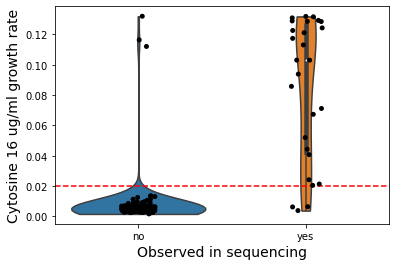

In [59]:
sns.violinplot(data=all_pairs_df[all_pairs_df['validation']=='yes'], x='in_single_col_seq', y='mean_growth_rate', cut=0)
sns.stripplot(data=all_pairs_df[all_pairs_df['validation']=='yes'], x='in_single_col_seq', y='mean_growth_rate', color='k')



plt.xlabel('Observed in sequencing', fontsize=14)
plt.ylabel('Cytosine 16 ug/ml growth rate', fontsize=14)

plt.axhline(0.02, color='red', ls='--')

In [60]:
len(all_pairs_df[(all_pairs_df['validation']=='yes')&(all_pairs_df['in_single_col_seq']=='yes')])

27

In [61]:
ref_wt = np.mean(all_pairs_df[(all_pairs_df['allele_2']=='wt')|(all_pairs_df['allele_1'].str.contains('wt'))]['mean_growth_rate'])
ref_wt

0.13074499999999994

In [41]:
all_pairs_df['fitness'] = all_pairs_df['mean_growth_rate']/ref_wt
all_pairs_df

NameError: name 'all_pairs_df' is not defined

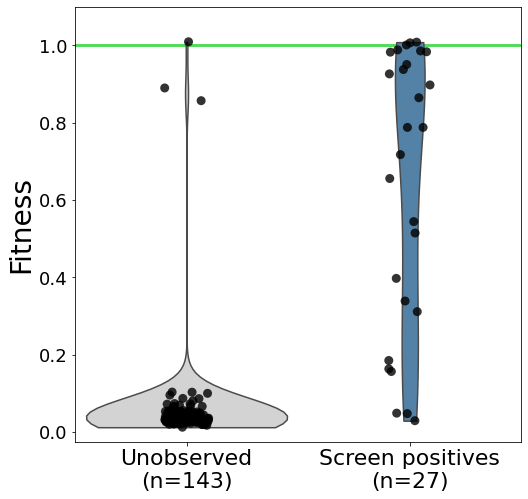

In [66]:
plt.figure(figsize=(8,8))

np.random.seed(2)

sns.violinplot(data=all_pairs_df[all_pairs_df['validation']=='yes'], x='in_single_col_seq', y='fitness', cut=0, palette={'yes':'steelblue', 'no': 'lightgrey'}, width=0.9, inner=None )
sns.stripplot(data=all_pairs_df[all_pairs_df['validation']=='yes'], x='in_single_col_seq', y='fitness', color='k', alpha=0.8, size=9, edgecolor='k', zorder=9)

plt.xticks([0,1], ['Unobserved\n(n=143)', 'Screen positives\n(n=27)'], fontsize=22)

plt.xlabel('', fontsize=16)
plt.ylabel('Fitness', fontsize=28)
plt.yticks(fontsize=18)
plt.ylim(-0.025,1.1)


plt.axhline(1, color=mut_colors['WT-like'], lw=3, zorder=0)


plt.savefig('./figures/validations_talk.svg', format='svg', dpi=600)

In [112]:
lof_mutant_list = ['L61F', 'I65F', 'G76H', 'G76M', 'G76Y', 'Y79K', # low+ lof
                   'G14*', 'A59H', 'T60F', 'T60R', 'E69V', 'C71Y', 'Y79E', 'Y79H', 'C94D', 'Y101H', 'R136I', # nonsense-like
                   'R53D', 'R53I', 'H62C', 'E64C', 'E64S', 'E64V', 'E69L', 'G72P', 'R73G', 'L74P', 'Y79S', 'M93G', 
                   'A97F', 'M100W', 'F153*', 'D155A', 'D155S', 'I156P' ]

all_lof_x_lof = all_pairs_df[(all_pairs_df['allele_1'].isin(lof_mutant_list))&(all_pairs_df['allele_2'].isin(lof_mutant_list))]

all_lof_x_lof[all_lof_x_lof['fitness'] >= 0.02/ref_wt]

,allele_1,allele_2,growth_rate_r1,growth_rate_r2,validation,mean_growth_rate,in_single_col_seq,n_indep_crosses,expected_freq,fitness
60,A59H,E69V,0.01472,0.0278,no,0.02126,no,NaN,NaN,0.162607
64,A59H,G72P,0.02432,0.04368,no,0.03400,no,NaN,NaN,0.260048
65,A59H,G76M,0.11212,0.11908,no,0.11560,no,NaN,NaN,0.884164
70,A59H,M100W,0.12424,0.12884,no,0.12654,no,NaN,NaN,0.967838
76,A59H,R73G,0.0642,0.0318,no,0.04800,no,NaN,NaN,0.367127
...,...,...,...,...,...,...,...,...,...,...
1021,M100W,R53I,0.1326,0.1306,yes,0.13160,yes,1.0,-19.479821,1.006539
1027,M100W,T60R,0.12688,0.13344,no,0.13016,no,NaN,NaN,0.995526
1113,R53I,Y101H,0.12628,0.13388,no,0.13008,no,NaN,NaN,0.994914
1116,R53I,Y79K,0.1208,0.10472,no,0.11276,no,NaN,NaN,0.862442


In [117]:
all_pairs_df.drop([1223, 1224]).to_csv('./validations_growth_rate.csv', sep=',')

In [118]:
all_lof_x_lof['fitness'].dropna()

49      0.040384
50      0.036789
52      0.052927
53      0.018892
54      0.023251
          ...   
1206    0.034189
1207    0.037172
1211    0.026005
1212    0.022563
1216    0.022028
Name: fitness, Length: 601, dtype: float64

In [119]:
130-27

103

In [120]:

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [121]:
np.nanmedian(all_pairs_df[(all_pairs_df['allele_2']=='wt')|(all_pairs_df['allele_1'].str.contains('wt'))]['mean_growth_rate'])




0.13168000000000002

In [122]:
mutant_order = ['wt',  #ctrl
                'A23N', 'N39F', 'S66M', 'C71A', 'L74Q', 'E75R', 'S89V', 'I98L', 'T124Y', 'D134C', 'G29Q', 'E135D', # wt-like
                'L61F', 'I65F', 'G76H', 'G76M', 'G76Y', 'Y79K', # partial lof
                'G14*', 'A59H', 'T60F', 'T60R', 'E69V', 'C71Y', 'Y79E', 'Y79H', 'C94D', 'Y101H', 'R136I', # nonsense-like
                'R53D', 'R53I', 'H62C', 'E64C', 'E64S', 'E64V', 'E69L', 'G72P', 'R73G', 'L74P', 'Y79S', 'M93G', 
                'A97F', 'M100W', 'F153*', 'D155A', 'D155S', 'I156P',
                'delta' # complementing mutant
               ]


mutant_order_ticks = ['WT',  #ctrl
                'A23N', 'N39F', 'S66M', 'C71A', 'L74Q', 'E75R', 'S89V', 'I98L', 'T124Y', 'D134C', 'G29Q', 'E135D', # wt-like
                'L61F', 'I65F', 'G76H', 'G76M', 'G76Y', 'Y79K', # partial lof
                'G14*', 'A59H', 'T60F', 'T60R', 'E69V', 'C71Y', 'Y79E', 'Y79H', 'C94D', 'Y101H', 'R136I', # nonsense-like
                'R53D', 'R53I', 'H62C', 'E64C', 'E64S', 'E64V', 'E69L', 'G72P', 'R73G', 'L74P', 'Y79S', 'M93G', 
                'A97F', 'M100W', 'F153*', 'D155A', 'D155S', 'I156P',
                r'$\Delta$' # complementing mutant
                ]


In [123]:
ctrl_list = ['wt', 'delta'] #ctrl
wt_like_list = ['A23N', 'N39F', 'S66M', 'C71A', 'L74Q', 'E75R', 'S89V', 'I98L', 'T124Y', 'D134C', 'G29Q', 'E135D'] # wt-like
low_lof_list = ['L61F', 'I65F', 'G76H', 'G76M', 'G76Y', 'Y79K'] # partial lof
high_lof_list = ['G14*', 'A59H', 'T60F', 'T60R', 'E69V', 'C71Y', 'Y79E', 'Y79H', 'C94D', 'Y101H', 'R136I', # nonsense-like
                'R53D', 'R53I', 'H62C', 'E64C', 'E64S', 'E64V', 'E69L', 'G72P', 'R73G', 'L74P', 'Y79S', 'M93G', 
                'A97F', 'M100W', 'F153*', 'D155A', 'D155S', 'I156P']  # complementing mutant

In [124]:
mut_colors

{'WT-like': (0.33999999999999997, 0.86, 0.3712),
 'Nonsense-like': '#d41159',
 'Front minima': (0.3712, 0.33999999999999997, 0.86),
 'nan': 'grey'}

In [125]:
error_range = np.nanstd(all_pairs_df[(all_pairs_df['allele_2']=='wt')|(all_pairs_df['allele_1'].str.contains('wt'))]['mean_growth_rate'], ddof=1)*4
error_range, error_range/ref_wt

(0.01684932198285889, 0.12887163549549807)

In [126]:
full_list = ['D134C', 'G29Q', 'E135D', # wt-like
            'L61F', 'I65F', 'G76H', 'G76M', 'G76Y', 'Y79K', # partial lof
            'G14*', 'A59H', 'T60F', 'T60R', 'E69V', 'C71Y', 'Y79E', 'Y79H', 'C94D', 'Y101H', 'R136I', # nonsense-like
            'R53D', 'R53I', 'H62C', 'E64C', 'E64S', 'E64V', 'E69L', 'G72P', 'R73G', 'L74P', 'Y79S', 'M93G', 
            'A97F', 'M100W', 'F153*', 'D155A', 'D155S', 'I156P']



wt_like_list_short = ['D134C', 'G29Q', 'E135D'] # wt-like
low_lof_list = ['L61F', 'I65F', 'G76H', 'G76M', 'G76Y', 'Y79K'] # partial lof
high_lof_list = ['G14*', 'A59H', 'T60F', 'T60R', 'E69V', 'C71Y', 'Y79E', 'Y79H', 'C94D', 'Y101H', 'R136I'] # nonsense-like
validations = ['R53D', 'R53I', 'H62C', 'E64C', 'E64S', 'E64V', 'E69L', 'G72P', 'R73G', 'L74P', 'Y79S', 'M93G', 
                'A97F', 'M100W', 'F153*', 'D155A', 'D155S', 'I156P']  # complementing mutant

dict_trans_inters = {}

tot_inter = 0
tot_tested = 0

for val_mutant in validations:
    
    val_mutant_slice = all_pairs_df[(all_pairs_df['allele_1'] == val_mutant)|(all_pairs_df['allele_2']==val_mutant)]
    
    val_mutant_counter = Counter()
    val_mutant_counter['wt-like'] = 0
    val_mutant_counter['low_lof'] = 0
    val_mutant_counter['high_lof'] = 0
    val_mutant_counter['validations'] = 0
    
    for x in range(0,len(full_list)):

        partner = full_list[x]

       

        if partner == 'wt':
            expected_val = list(all_pairs_df[(all_pairs_df['allele_1']=='delta')&(all_pairs_df['allele_2']==partner)]['fitness'])[0]

        else:      
            expected_val = list(all_pairs_df[(all_pairs_df['allele_2']=='delta')&(all_pairs_df['allele_1']==partner)]['fitness'])[0]
            
        if val_mutant == partner:
            observed_val = list(val_mutant_slice[(val_mutant_slice['allele_1']==val_mutant)&(val_mutant_slice['allele_2']==val_mutant)]['fitness'])[0]
            #print(mutant, observed_val)

        elif partner in list(val_mutant_slice['allele_1']):
            observed_val = list(val_mutant_slice[val_mutant_slice['allele_1']==partner]['fitness'])[0]

        elif partner in list(val_mutant_slice['allele_2']):
            observed_val = list(val_mutant_slice[val_mutant_slice['allele_2']==partner]['fitness'])[0]
            
        #print(observed_val, expected_val, error_range/ref_wt, np.abs((expected_val - observed_val)))
            
            
        if (observed_val-expected_val) > error_range/ref_wt:
            if val_mutant == 'E69L':
                print(val_mutant, partner, observed_val, expected_val, error_range/ref_wt, np.abs((expected_val - observed_val)))
            
            #print(partner)
            if partner in wt_like_list_short:
                val_mutant_counter['wt-like'] +=1
            elif partner in low_lof_list:
                val_mutant_counter['low_lof'] +=1
            elif partner in high_lof_list:
                val_mutant_counter['high_lof'] +=1
            elif partner in validations:
                val_mutant_counter['validations'] +=1
                
            tot_inter+=1
        tot_tested+=1
            
    dict_trans_inters[val_mutant]=val_mutant_counter
            
#dict_trans_inters

E69L D134C 0.929136869478757 0.7718842020727366 0.12887163549549807 0.1572526674060204
E69L E135D 0.8639718536081703 0.7058013690772127 0.12887163549549807 0.1581704845309576


In [127]:

mut_by_sum_inter = {}
for mut in dict_trans_inters.keys():
    sum_inter = sum(dict_trans_inters[mut].values())
    print(sum_inter)
    mut_by_sum_inter[mut] = sum_inter
    
sorted_mut_by_inter = list({k: v for k, v in sorted(mut_by_sum_inter.items(), key=lambda item: item[1])}.keys())[::-1]
sorted_mut_by_inter

4
11
8
15
15
16
2
4
11
5
7
4
3
18
7
12
12
10


['M100W',
 'E64V',
 'E64S',
 'E64C',
 'D155S',
 'D155A',
 'R73G',
 'R53I',
 'I156P',
 'H62C',
 'F153*',
 'Y79S',
 'L74P',
 'M93G',
 'G72P',
 'R53D',
 'A97F',
 'E69L']

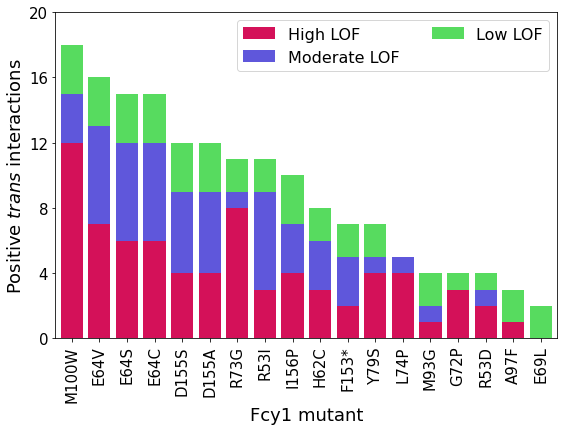

In [128]:
plt.figure(figsize=(9,6))

for x in range(0, len(sorted_mut_by_inter)):
    bar_val = dict_trans_inters[sorted_mut_by_inter[x]]['validations']
    bar_high= dict_trans_inters[sorted_mut_by_inter[x]]['high_lof'] + bar_val
    bar_low = dict_trans_inters[sorted_mut_by_inter[x]]['low_lof']
    bar_wt_like = dict_trans_inters[sorted_mut_by_inter[x]]['wt-like']
    plt.bar(x, bar_high, color='#d41159')
    plt.bar(x, bar_low, color=mut_colors['Front minima'], bottom = bar_high)
    plt.bar(x, bar_wt_like, color = mut_colors['WT-like'], bottom = bar_high+bar_low)
    
plt.xticks(range(0, len(sorted_mut_by_inter)), sorted_mut_by_inter, rotation=90, fontsize=15)
plt.yticks([0,4,8,12,16,20], [str(x) for x in [0,4,8,12,16,20]], fontsize=15)
plt.ylabel('Positive $\it{trans}$ interactions', fontsize=18)
plt.xlabel('Fcy1 mutant', fontsize=18)
plt.legend(['High LOF', 'Moderate LOF', 'Low LOF'], ncol=2, fontsize=16, loc='upper right')
plt.xlim(-0.6,17.6)

plt.savefig('./figures/fig3_panel_b.svg', format='svg', dpi=600)

In [129]:
from collections import Counter
lof_mutant_list = ['L61F', 'I65F', 'G76H', 'G76M', 'G76Y', 'Y79K', # low+ lof
                   'G14*', 'A59H', 'T60F', 'T60R', 'E69V', 'C71Y', 'Y79E', 'Y79H', 'C94D', 'Y101H', 'R136I', # nonsense-like
                   'R53D', 'R53I', 'H62C', 'E64C', 'E64S', 'E64V', 'E69L', 'G72P', 'R73G', 'L74P', 'Y79S', 'M93G', 
                   'A97F', 'M100W', 'F153*', 'D155A', 'D155S', 'I156P' ]

pos_trans_effect_counter = Counter()

for mutant in lof_mutant_list:
    
    mutant_slice = all_pairs_df[(all_pairs_df['allele_1'] == mutant)|(all_pairs_df['allele_2']== mutant)]
    
    mutant_val = list(mutant_slice[mutant_slice['allele_2']=='delta']['fitness'])[0]
    
    
    for x in range(0,len(lof_mutant_list)):
    
        partner = lof_mutant_list[x]
        
        partner_val = list(all_pairs_df[(all_pairs_df['allele_2']=='delta')&(all_pairs_df['allele_1']==lof_mutant_list[x])]['fitness'])[0]
        
        if mutant == partner:
            observed_val = list(mutant_slice[(mutant_slice['allele_1']==mutant)&(mutant_slice['allele_2']==mutant)]['fitness'])[0]
            #print(mutant, observed_val)

        elif partner in list(mutant_slice['allele_1']):
            observed_val = list(mutant_slice[mutant_slice['allele_1']==partner]['fitness'])[0]

        elif partner in list(mutant_slice['allele_2']):
            observed_val = list(mutant_slice[mutant_slice['allele_2']==partner]['fitness'])[0]
            
        expected_val = max([mutant_val, partner_val])
            
            
        if (observed_val-expected_val) > error_range/ref_wt:
            
            pos_trans_effect_counter[mutant] += 1
            
        if mutant == partner:
            print(mutant, mutant_val, lof_mutant_list[x], partner_val, expected_val, observed_val, observed_val-expected_val)
    
    

pos_trans_effect_counter

L61F 0.0772496080156029 L61F 0.0772496080156029 0.0772496080156029 0.9649317373513335 0.8876821293357307
I65F 0.022333550040154766 I65F 0.022333550040154766 0.022333550040154766 nan nan
G76H 0.06195265593330528 G76H 0.06195265593330528 0.06195265593330528 nan nan
G76M 0.04130177062220345 G76M 0.04130177062220345 0.04130177062220345 0.04833836858006038 0.007036597957856931
G76Y 0.03579486787257654 G76Y 0.03579486787257654 0.03579486787257654 nan nan
Y79K 0.029140693716777005 Y79K 0.029140693716777005 0.029140693716777005 0.026004818539906042 -0.003135875176870962
G14* 0.03594783739339924 G14* 0.03594783739339924 0.03594783739339924 nan nan
A59H 0.043596313434548055 A59H 0.043596313434548055 0.043596313434548055 0.04038395349726574 -0.0032123599372823122
T60F 0.021415732915216524 T60F 0.021415732915216524 0.021415732915216524 0.03258250793529401 0.011166775020077489
T60R 0.016673677769704298 T60R 0.016673677769704298 0.016673677769704298 0.03824238020574405 0.021568702436039755
E69V 0.01

Counter({'L61F': 16,
         'I65F': 7,
         'G76H': 21,
         'G76M': 14,
         'G76Y': 10,
         'Y79K': 7,
         'A59H': 9,
         'T60R': 4,
         'E69V': 9,
         'Y79H': 1,
         'C94D': 1,
         'Y101H': 13,
         'R136I': 1,
         'R53D': 3,
         'R53I': 9,
         'H62C': 6,
         'E64C': 12,
         'E64S': 12,
         'E64V': 13,
         'G72P': 2,
         'R73G': 9,
         'L74P': 5,
         'Y79S': 5,
         'M93G': 2,
         'A97F': 1,
         'M100W': 15,
         'F153*': 5,
         'D155A': 9,
         'D155S': 7,
         'I156P': 7})

In [130]:
for mutant in lof_mutant_list:
    if mutant not in list(pos_trans_effect_counter.keys()):
        pos_trans_effect_counter[mutant] = 0
pos_trans_effect_counter

Counter({'L61F': 16,
         'I65F': 7,
         'G76H': 21,
         'G76M': 14,
         'G76Y': 10,
         'Y79K': 7,
         'A59H': 9,
         'T60R': 4,
         'E69V': 9,
         'Y79H': 1,
         'C94D': 1,
         'Y101H': 13,
         'R136I': 1,
         'R53D': 3,
         'R53I': 9,
         'H62C': 6,
         'E64C': 12,
         'E64S': 12,
         'E64V': 13,
         'G72P': 2,
         'R73G': 9,
         'L74P': 5,
         'Y79S': 5,
         'M93G': 2,
         'A97F': 1,
         'M100W': 15,
         'F153*': 5,
         'D155A': 9,
         'D155S': 7,
         'I156P': 7,
         'G14*': 0,
         'T60F': 0,
         'C71Y': 0,
         'Y79E': 0,
         'E69L': 0})

In [131]:
moderate_dist = []
high_dist = []
validations_dist = []

for mutant in pos_trans_effect_counter.keys():
    if mutant in low_lof_list:
        moderate_dist.append(pos_trans_effect_counter[mutant])
    if mutant in high_lof_list:
        high_dist.append(pos_trans_effect_counter[mutant])
    if mutant in validations:
        validations_dist.append(pos_trans_effect_counter[mutant])
        
moderate_dist, high_dist, validations_dist

([16, 7, 21, 14, 10, 7],
 [9, 4, 9, 1, 1, 13, 1, 0, 0, 0, 0],
 [3, 9, 6, 12, 12, 13, 2, 9, 5, 5, 2, 1, 15, 5, 9, 7, 7, 0])

In [133]:
import random as rnd
rnd.seed(1)
rnd.shuffle(moderate_dist)
rnd.shuffle(high_dist)
rnd.shuffle(validations_dist)

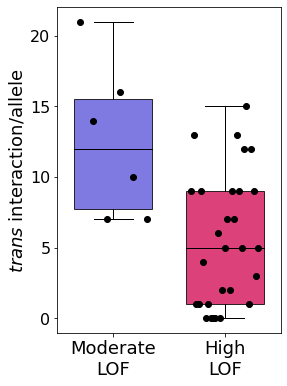

In [134]:
plt.figure(figsize=(4,6))

boxplot_colors = [mut_colors['Front minima'], '#d41159']

boxplot_vals = [moderate_dist, (high_dist+validations_dist)]

ax1 = plt.boxplot(boxplot_vals, patch_artist=True, medianprops=dict(color='k'), widths=0.7)

for patch, color in zip(ax1['boxes'], boxplot_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)
    
for x in range(1,3):
    plt.plot([x for x in np.linspace(x-0.3, x+0.3, len(boxplot_vals[x-1]))], boxplot_vals[x-1], 'ko', zorder=9)


plt.xticks([1,2], ['Moderate\nLOF', 'High\nLOF'], fontsize=18)
plt.ylabel('$\it{trans}$ interaction/allele', fontsize=18)
plt.yticks(fontsize=16)

plt.savefig('./figures/figure3_c.svg', format='svg', dpi=600)

In [136]:
mutants_only = ['A23N', 'N39F', 'S66M', 'C71A', 'L74Q', 'E75R', 'S89V', 'I98L', 'T124Y', 'D134C', 'G29Q', 'E135D', # wt-like
                'L61F', 'I65F', 'G76H', 'G76M', 'G76Y', 'Y79K', # partial lof
                'G14*', 'A59H', 'T60F', 'T60R', 'E69V', 'C71Y', 'Y79E', 'Y79H', 'C94D', 'Y101H', 'R136I', # nonsense-like
                'R53D', 'R53I', 'H62C', 'E64C', 'E64S', 'E64V', 'E69L', 'G72P', 'R73G', 'L74P', 'Y79S', 'M93G', 
                'A97F', 'M100W', 'F153*', 'D155A', 'D155S', 'I156P']

In [137]:
all_pairs_df[all_pairs_df['allele_1']=='delta']

,allele_1,allele_2,growth_rate_r1,growth_rate_r2,validation,mean_growth_rate,in_single_col_seq,n_indep_crosses,expected_freq,fitness
1220,delta,delta,0.00408,0.00408,no,0.00408,no,NaN,NaN,0.031206
1221,delta,wt,NaN,0.13012,no,0.13012,no,NaN,NaN,0.995220


In [140]:
all_pairs_df[(all_pairs_df['growth_rate_r1'].isna()==False)&(all_pairs_df['growth_rate_r2'].isna()==False)]
#number of values with cross replicates

,allele_1,allele_2,growth_rate_r1,growth_rate_r2,validation,mean_growth_rate,in_single_col_seq,n_indep_crosses,expected_freq,fitness
0,A23N,A23N,0.1306,0.1306,no,0.13060,no,NaN,NaN,0.998891
1,A23N,A59H,0.136,0.1264,no,0.13120,no,NaN,NaN,1.003480
2,A23N,A97F,0.13348,0.1334,no,0.13344,no,NaN,NaN,1.020613
3,A23N,C71A,0.1312,0.12672,no,0.12896,no,NaN,NaN,0.986347
4,A23N,C94D,0.1308,0.1262,no,0.12850,no,NaN,NaN,0.982829
...,...,...,...,...,...,...,...,...,...,...
1212,Y79K,Y79S,0.004,0.0019,no,0.00295,no,NaN,NaN,0.022563
1213,Y79K,delta,0.00532,0.0023,no,0.00381,no,NaN,NaN,0.029141
1216,Y79S,Y79S,0.00288,0.00288,yes,0.00288,no,NaN,NaN,0.022028
1217,Y79S,delta,0.0022,0.0026,no,0.00240,no,NaN,NaN,0.018356


In [141]:
len(all_pairs_df[~(all_pairs_df['growth_rate_r1'].isna()==False)&~(all_pairs_df['growth_rate_r2'].isna()==False)])


47

In [142]:
len(all_pairs_df)-46

1179

In [143]:
M100W_delta = 1963
delta_M00W = 1304

E64V_delta = 1101
delta_E64V = 1830

E64V_M100W = 2093
M100W_E64V = 802



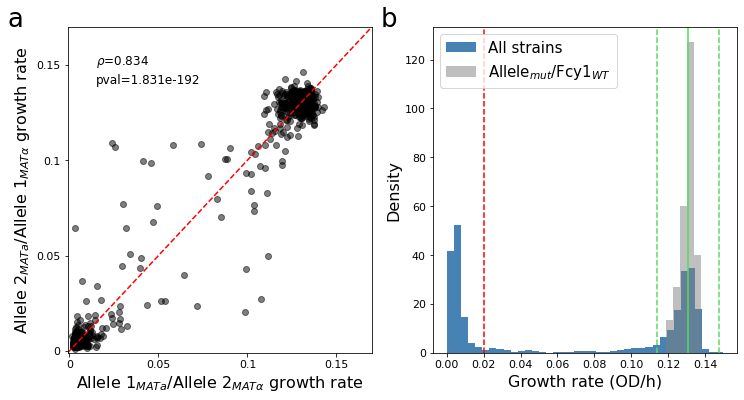

In [144]:
fig = plt.figure(figsize=(12,6))



ax1 = plt.subplot(1,2,1)

plt.scatter(mat_a_alpha, mat_alpha_a, color = 'k', alpha=0.5)

plt.xlim(-0.001, 0.17)
plt.ylim(-0.001, 0.17)


plt.plot([-0.001, 0.17],[-0.001, 0.17], 'r--')

vals = stats.spearmanr(mat_a_alpha, mat_alpha_a)

plt.text(0.015,0.15, r'$\rho$='+str(np.round(vals[0], 3)), fontsize=12)
plt.text(0.015,0.14, 'pval='+str(np.format_float_scientific(vals[1],3)), fontsize=12)

plt.xlabel(r'Allele 1$_{MATa}$/Allele 2$_{MAT\alpha}$ growth rate', fontsize=16)
plt.ylabel(r'Allele 2$_{MATa}$/Allele 1$_{MAT\alpha}$ growth rate', fontsize=16)

#plt.axvline(0.01)
#plt.axhline(0.01)

#plt.axvline(0.122)
#plt.axhline(0.122)


plt.xticks([0,0.05,0.10, 0.15], [str(x) for x in [0,0.05,0.10, 0.15]], fontsize=11)
plt.yticks([0,0.05,0.10, 0.15], [str(x) for x in [0,0.05,0.10, 0.15]], fontsize=11)

######################################################
ax2 = plt.subplot(1,2,2)

plt.hist([x for x in heatmap_df.to_numpy().flatten() if np.isnan(x)==False], bins=np.linspace(0,0.15, 40), density=True, color='steelblue')


plt.hist(heatmap_df.T['wt'].dropna(), density=True, alpha=0.5, bins=5, color='grey')

plt.xlabel('Growth rate (OD/h)', fontsize=16)
plt.ylabel('Density', fontsize=16)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.legend(['All strains', 'Allele$_{mut}$/Fcy1$_{WT}$'], fontsize=15, loc='upper left')

plt.axvline(0.02, color='red', linestyle='--')


plt.axvline(ref_wt, color=mut_colors['WT-like'])
plt.axvline(ref_wt-error_range, color=mut_colors['WT-like'], linestyle='--')
plt.axvline(ref_wt+error_range, color=mut_colors['WT-like'], linestyle='--')

ax1.text(-0.035,0.17, 'a', fontsize=26)
ax1.text(0.175,0.17, 'b', fontsize=26)


plt.savefig('./figures/all_by_all_rep_corr_dist.svg', format='svg', dpi=300, bbox_inches = 'tight')


## Compare fitness to WT ancestor

In [150]:
def plot_mutant_curve(array_index, color, t=20):
    
    plate_384 = array.at[array_index, 'n_384well']
    quadrant = array.at[array_index, 'quadrant']
    
    well = array.at[array_index, 'well']
    
    path = './validations_all_by_all/growth_curves/lofxlof_crosses/plate_'+str(plate_384)+'_'+quadrant+'.xlsx'
    df = pd.read_excel(path, skiprows=[0,2]+[x for x in range(99,133)], index_col=0)
    
    format_table(df)
    
    plt.plot(list(df.T.index), df.T[well], linestyle='-', color=color)
    


In [152]:
dose_rep_array = pd.read_csv('./dose_rep_array_96.csv', sep=',')
dose_rep_array['allele_pair'] = dose_rep_array['mutant_a']+'/'+dose_rep_array['mutant_alpha']
dose_rep_array

,index,Mata,MatAlpha,well,quadrant,n_96well,n_384well,mutant_a,mutant_alpha,growth_rate,rep,rearray_96,allele_pair
0,5.0,4.0,39.0,C1,C,3.0,1.0,E64V,E69V,0.10632,1.0,A1,E64V/E69V
1,90.0,24.0,10.0,F3,B,2.0,1.0,D155S,R73G,0.11472,1.0,B1,D155S/R73G
2,126.0,33.0,18.0,H4,B,2.0,1.0,T60R,M100W,0.12688,1.0,C1,T60R/M100W
3,182.0,42.0,47.0,D6,B,2.0,1.0,delta,delta,0.00408,1.0,D1,delta/delta
4,249.0,4.0,9.0,E8,D,4.0,1.0,E64V,G72P,0.06420,1.0,E1,E64V/G72P
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1931.0,5.0,12.0,F1,A,21.0,6.0,E64C,Y79S,0.09912,2.0,C11,E64C/Y79S
73,1951.0,24.0,18.0,H1,B,22.0,6.0,D155S,M100W,0.12096,2.0,D11,D155S/M100W
74,2009.0,31.0,18.0,E3,B,22.0,6.0,A59H,M100W,0.12884,2.0,E11,A59H/M100W
75,2061.0,5.0,11.0,G5,A,21.0,6.0,E64C,L74P,0.08572,2.0,F11,E64C/L74P


In [153]:
row_96_to_row_384 = {'A':['B', 'C'], 
                     'B':['D', 'E'],
                     'C':['F', 'G'],
                     'D':['H', 'I'],
                     'E':['J', 'K'],
                     'F':['L', 'M'],
                     'G':['N', 'O']}

col_96_to_col_384 = {'1':['2','3'],
                     '2':['4','5'],
                     '3':['6','7'],
                     '4':['8','9'],
                     '5':['10','11'],
                     '6':['12','13'],
                     '7':['14','15'],
                     '8':['16','17'],
                     '9':['18','19'],
                     '10':['20','21'],
                     '11':['22','23']}



def get_384_wells_from_96(well):
    row = well[0]
    col = well[1:]
    
    well_list = []
    
    for y in row_96_to_row_384[row]:
        for x in col_96_to_col_384[col]:
            coord = y+x
            
            well_list.append(coord)
            
    return well_list
            
    
    
get_384_wells_from_96('G11')

['N22', 'N23', 'O22', 'O23']

In [154]:
dose_rep_data = pd.read_excel('./growth_curves/validations_lofxlof_dose_rep.xlsx', skiprows=[0,2]+[x for x in range(387,419)], index_col=0)
format_table(dose_rep_data)
dose_rep_data

,0.000000,0.250000,0.500000,0.749722,0.999722,1.249722,1.499722,1.749722,1.999722,2.249722,...,47.246944,47.496944,47.746944,47.996944,48.246944,48.496944,48.746944,48.996944,49.246944,49.496944
A1,0.092999,0.092941,0.092806,0.092735,0.092681,0.092742,0.092903,0.092708,0.092698,0.092765,...,0.092387,0.092394,0.092462,0.092575,0.092504,0.092486,0.092505,0.092512,0.092520,0.092603
A2,0.093800,0.093585,0.093551,0.093506,0.093570,0.093596,0.093667,0.093511,0.093602,0.093632,...,0.093443,0.093385,0.093454,0.093506,0.093453,0.093410,0.093344,0.093513,0.093365,0.093337
A3,0.094492,0.094360,0.094378,0.094366,0.094378,0.094344,0.094404,0.094311,0.094366,0.094406,...,0.094176,0.094114,0.094156,0.094190,0.094147,0.094125,0.094089,0.094169,0.094079,0.094180
A4,0.094474,0.094287,0.094393,0.094364,0.094370,0.094335,0.094397,0.094216,0.094399,0.094363,...,0.094186,0.094140,0.094224,0.094344,0.094231,0.094158,0.094147,0.094159,0.094059,0.094171
A5,0.093169,0.093098,0.093056,0.093023,0.093046,0.092993,0.093052,0.092968,0.093037,0.093026,...,0.092879,0.092781,0.092871,0.092931,0.092864,0.092807,0.092787,0.092789,0.092748,0.092820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P20,0.094275,0.094375,0.094469,0.094304,0.094343,0.094181,0.094404,0.094311,0.094236,0.094325,...,0.094600,0.094549,0.094423,0.094578,0.094574,0.094457,0.094433,0.094521,0.094375,0.094499
P21,0.094887,0.095090,0.095218,0.094964,0.095041,0.094852,0.095038,0.094843,0.094879,0.094929,...,0.095000,0.095001,0.094868,0.095027,0.094970,0.094912,0.094829,0.094889,0.094803,0.094925
P22,0.094160,0.094396,0.094683,0.094577,0.094779,0.094601,0.094850,0.094783,0.094748,0.094853,...,0.095176,0.095161,0.095054,0.095150,0.095162,0.095032,0.095060,0.095070,0.094953,0.095101
P23,0.093634,0.093826,0.093930,0.093790,0.093778,0.093673,0.093865,0.093761,0.093708,0.093769,...,0.093727,0.093728,0.093549,0.093620,0.093629,0.093511,0.093460,0.093467,0.093521,0.093611


In [298]:
#for row in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']:
#    for col in range(1, 25):
#        plt.plot(dose_rep_data.T[row+str(col)])
#    plt.xlim(0,40)
#    print(row)
#    plt.show()

In [156]:

index =0

conc_list = [12, 16, 20, 24]

well_96_dict = {}
allele_pair_dict = {}
rep_dict = {}

well_384_dict = {}
cy_conc_dict = {}
growth_rate_dict = {}



for strain in list(dose_rep_array.index):
    
    well_96 = dose_rep_array.at[strain, 'rearray_96']
    allele_pair = dose_rep_array.at[strain, 'allele_pair']
    rep = dose_rep_array.at[strain, 'rep']
    
    
    
    
    well_list = get_384_wells_from_96(well_96)
    
    for x in range(0,4):
        
        cy_conc_dict[index] = conc_list[x]
        well = well_list[x]
        well_384_dict[index] = well
        #print((well[0], int(well[1:])), well, conc_list[x])
        growth_rate_dict[index] = get_derivative_growth_rate(tuple([well[0], int(well[1:])]), dose_rep_data.T, tmax=40)[0]
        #print(get_derivative_growth_rate(tuple([well[0], int(well[1:])]), dose_rep_data.T, tmax=40)[0])
        
        well_96_dict[index] = well_96
        allele_pair_dict[index] = allele_pair
        rep_dict[index] = rep
        
        
        index+=1
        

    
    
dose_rep_df = pd.DataFrame([pd.Series(well_96_dict, name='well_96')]).T

dose_rep_df['cytosine_conc'] = pd.Series(cy_conc_dict)
dose_rep_df['allele_pair'] = pd.Series(allele_pair_dict)
dose_rep_df['replicate'] = pd.Series(rep_dict)
dose_rep_df['growth_rate'] = pd.Series(growth_rate_dict)

dose_rep_df['mutant_conc'] = dose_rep_df['allele_pair']+'_'+dose_rep_df['cytosine_conc'].astype(str)



In [157]:
dose_rep_df[dose_rep_df['allele_pair']=='empty/empty']

,well_96,cytosine_conc,allele_pair,replicate,growth_rate,mutant_conc
152,D6,12,empty/empty,NaN,0.001076,empty/empty_12
153,D6,16,empty/empty,NaN,0.001340,empty/empty_16
154,D6,20,empty/empty,NaN,0.001412,empty/empty_20
155,D6,24,empty/empty,NaN,0.036560,empty/empty_24


In [158]:
dose_rep_df.drop([152,153,154,155], inplace=True)

In [160]:
pairs = dose_rep_df[~dose_rep_df['allele_pair'].isin(['delta/wt', 'delta/delta'])]
pairs

,well_96,cytosine_conc,allele_pair,replicate,growth_rate,mutant_conc
0,A1,12,E64V/E69V,1.0,0.07600,E64V/E69V_12
1,A1,16,E64V/E69V,1.0,0.13080,E64V/E69V_16
2,A1,20,E64V/E69V,1.0,0.19460,E64V/E69V_20
3,A1,24,E64V/E69V,1.0,0.21292,E64V/E69V_24
4,B1,12,D155S/R73G,1.0,0.08280,D155S/R73G_12
...,...,...,...,...,...,...
303,F11,24,E64C/L74P,2.0,0.18996,E64C/L74P_24
304,G11,12,E64V/M100W,2.0,0.15280,E64V/M100W_12
305,G11,16,E64V/M100W,2.0,0.18796,E64V/M100W_16
306,G11,20,E64V/M100W,2.0,0.22936,E64V/M100W_20


(0.9931476000304938, 9.327809621489978e-142)

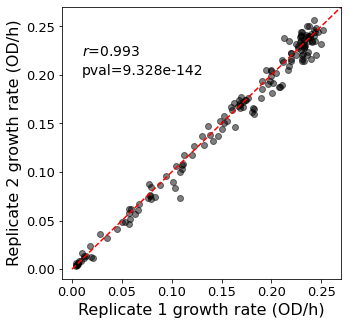

In [161]:
replicates = dose_rep_df.pivot(index="mutant_conc", columns="replicate", values="growth_rate")

plt.figure(figsize=(5,5))
plt.scatter(replicates[1], replicates[2], color='k', alpha=0.5)

plt.plot([0,0.3], [0,0.3], 'r--')

stats.pearsonr(replicates[1].dropna(), replicates[2].dropna())

plt.xlabel('Replicate 1 growth rate (OD/h)', fontsize=16)
plt.ylabel('Replicate 2 growth rate (OD/h)', fontsize=16)



vals = stats.pearsonr(replicates[1].dropna(), replicates[2].dropna())
plt.text(0.01,0.22, r'$\it{r}$='+str(np.round(vals[0], 3)), fontsize=14)
plt.text(0.01,0.20, 'pval='+str(np.format_float_scientific(vals[1],3)), fontsize=14)

plt.xlim(-0.01, 0.27)
plt.ylim(-0.01, 0.27)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

        
stats.pearsonr(replicates[1].dropna(), replicates[2].dropna())

In [162]:
len(replicates[1].dropna()), len(replicates[2].dropna())

(152, 152)

In [163]:
dose_rep_df[dose_rep_df['allele_pair']=='delta/delta']

,well_96,cytosine_conc,allele_pair,replicate,growth_rate,mutant_conc
12,D1,12,delta/delta,1.0,0.01176,delta/delta_12
13,D1,16,delta/delta,1.0,0.00480,delta/delta_16
14,D1,20,delta/delta,1.0,0.00580,delta/delta_20
15,D1,24,delta/delta,1.0,0.00512,delta/delta_24
180,D7,12,delta/delta,2.0,0.01164,delta/delta_12
181,D7,16,delta/delta,2.0,0.00376,delta/delta_16
182,D7,20,delta/delta,2.0,0.00496,delta/delta_20
183,D7,24,delta/delta,2.0,0.00448,delta/delta_24


In [164]:
dose_rep_df[dose_rep_df['allele_pair']=='empty/empty']

,well_96,cytosine_conc,allele_pair,replicate,growth_rate,mutant_conc


In [165]:
mean_val_pivot = dose_rep_df.pivot(index="mutant_conc", columns="replicate", values="growth_rate")

In [166]:
mean_val_pivot['mean_val'] = (mean_val_pivot[1]+mean_val_pivot[2])/2

mean_val_pivot

replicate,1.0,2.0,mean_val
mutant_conc,,,
A59H/M100W_12,0.12252,0.12640,0.12446
A59H/M100W_16,0.20872,0.18716,0.19794
A59H/M100W_20,0.23292,0.22768,0.23030
A59H/M100W_24,0.24460,0.22016,0.23238
A97F/M93G_12,0.16788,0.17468,0.17128
...,...,...,...
delta/delta_24,0.00512,0.00448,0.00480
delta/wt_12,0.17416,0.17448,0.17432
delta/wt_16,0.23080,0.24392,0.23736


In [167]:
mean_val_pivot['p-val'] = np.NaN


In [168]:
for row in list(mean_val_pivot.index):
    if row.split('_')[1] == '12':
        mean_val_pivot.at[row,'p-val'] = stats.ttest_ind([mean_val_pivot.loc['delta/wt_12'][1], mean_val_pivot.loc['delta/wt_12'][2]], 
                                                         [mean_val_pivot.loc[row][1], mean_val_pivot.loc[row][2]], equal_var=False)[1]
        
    elif row.split('_')[1] == '16':
        mean_val_pivot.at[row,'p-val'] = stats.ttest_ind([mean_val_pivot.loc['delta/wt_16'][1], mean_val_pivot.loc['delta/wt_16'][2]], 
                                                         [mean_val_pivot.loc[row][1], mean_val_pivot.loc[row][2]], equal_var=False)[1]
        
    elif row.split('_')[1] == '20':
        mean_val_pivot.at[row,'p-val'] = stats.ttest_ind([mean_val_pivot.loc['delta/wt_20'][1], mean_val_pivot.loc['delta/wt_20'][2]], 
                                                         [mean_val_pivot.loc[row][1], mean_val_pivot.loc[row][2]], equal_var=False)[1]
        
    elif row.split('_')[1] == '24':
        mean_val_pivot.at[row,'p-val'] = stats.ttest_ind([mean_val_pivot.loc['delta/wt_24'][1], mean_val_pivot.loc['delta/wt_24'][2]], 
                                                         [mean_val_pivot.loc[row][1], mean_val_pivot.loc[row][2]], equal_var=False)[1]
        
mean_val_pivot

replicate,1.0,2.0,mean_val,p-val
mutant_conc,,,,
A59H/M100W_12,0.12252,0.12640,0.12446,0.012027
A59H/M100W_16,0.20872,0.18716,0.19794,0.027945
A59H/M100W_20,0.23292,0.22768,0.23030,0.035087
A59H/M100W_24,0.24460,0.22016,0.23238,0.251484
A97F/M93G_12,0.16788,0.17468,0.17128,0.556829
...,...,...,...,...
delta/delta_24,0.00512,0.00448,0.00480,0.004103
delta/wt_12,0.17416,0.17448,0.17432,1.000000
delta/wt_16,0.23080,0.24392,0.23736,1.000000


In [185]:
mean_val_pivot['one_sided_pval'] = mean_val_pivot['p-val']/2
mean_val_pivot

replicate,1.0,2.0,mean_val,p-val,one_sided_pval
mutant_conc,,,,,
A59H/M100W_12,0.12252,0.12640,0.12446,0.012027,0.006013
A59H/M100W_16,0.20872,0.18716,0.19794,0.027945,0.013973
A59H/M100W_20,0.23292,0.22768,0.23030,0.035087,0.017543
A59H/M100W_24,0.24460,0.22016,0.23238,0.251484,0.125742
A97F/M93G_12,0.16788,0.17468,0.17128,0.556829,0.278414
...,...,...,...,...,...
delta/delta_24,0.00512,0.00448,0.00480,0.004103,0.002051
delta/wt_12,0.17416,0.17448,0.17432,1.000000,0.500000
delta/wt_16,0.23080,0.24392,0.23736,1.000000,0.500000


In [219]:
keep_index_list = [x for x in list(mean_val_pivot.index) if any(y not in x for y in ['I156P/Y79E', 'E69L/H62C','Y79S/L74P', 'M93G/M93G',
                                                                                     'D155S/G76M', 'E64V/E69V', 'I156P/Y79E', 'T60R/M100W'])]

mean_val_pivot.loc[keep_index_list].to_csv('./dose_rep_comp_pairs.csv', sep=',')

In [220]:
mean_val_pivot

replicate,1.0,2.0,mean_val,p-val,one_sided_pval
mutant_conc,,,,,
A59H/M100W_12,0.12252,0.12640,0.12446,0.012027,0.006013
A59H/M100W_16,0.20872,0.18716,0.19794,0.027945,0.013973
A59H/M100W_20,0.23292,0.22768,0.23030,0.035087,0.017543
A59H/M100W_24,0.24460,0.22016,0.23238,0.251484,0.125742
A97F/M93G_12,0.16788,0.17468,0.17128,0.556829,0.278414
...,...,...,...,...,...
delta/delta_24,0.00512,0.00448,0.00480,0.004103,0.002051
delta/wt_12,0.17416,0.17448,0.17432,1.000000,0.500000
delta/wt_16,0.23080,0.24392,0.23736,1.000000,0.500000


(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

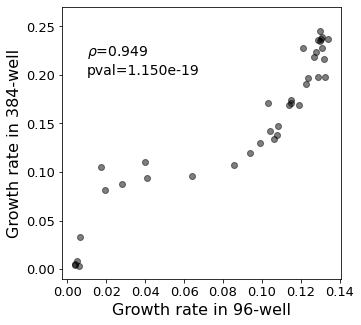

In [169]:
prev_list = []
dose_rep_list = []

plt.figure(figsize=(5,5))

for pair in list(mean_val_pivot.index):
    
    if '_16' in pair:
        
        prev_val = list(dose_rep_array[(dose_rep_array['allele_pair']==pair.strip('_16')) & (dose_rep_array['rep']==1)]['growth_rate'])[0]
        #print(prev_val)
    
        plt.plot(prev_val, mean_val_pivot.at[pair, 'mean_val'], 'ko', alpha=0.5)
        
        prev_list.append(prev_val)
        dose_rep_list.append(mean_val_pivot.at[pair, 'mean_val'])
        
plt.xlabel('Growth rate in 96-well', fontsize=16)
plt.ylabel('Growth rate in 384-well', fontsize=16)

vals = stats.spearmanr(prev_list, dose_rep_list)
plt.text(0.01,0.22, r'$\rho$='+str(np.round(vals[0], 3)), fontsize=14)
plt.text(0.01,0.20, 'pval='+str(np.format_float_scientific(vals[1],3)), fontsize=14)

        
stats.spearmanr(prev_list, dose_rep_list)
plt.ylim(-0.01, 0.27)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

In [170]:
mean_val_pivot.loc[['delta/wt_12', 'delta/wt_16', 'delta/wt_20', 'delta/wt_24']]

replicate,1.0,2.0,mean_val,p-val
mutant_conc,,,,
delta/wt_12,0.17416,0.17448,0.17432,1.0
delta/wt_16,0.23080,0.24392,0.23736,1.0
delta/wt_20,0.23504,0.23924,0.23714,1.0
delta/wt_24,0.23492,0.24152,0.23822,1.0


In [171]:
mean_val_pivot.loc[['D155A/M100W_12', 'D155A/M100W_16', 'D155A/M100W_20', 'D155A/M100W_24']]

replicate,1.0,2.0,mean_val,p-val
mutant_conc,,,,
D155A/M100W_12,0.16868,0.17128,0.16998,0.104416
D155A/M100W_16,0.23016,0.24020,0.23518,0.553542
D155A/M100W_20,0.23740,0.23496,0.23618,0.194002
D155A/M100W_24,0.25176,0.24624,0.24900,0.072357


In [173]:
np.mean([0.23080, 0.24392, 0.23504, 0.23924, 0.23492, 0.24152]), np.std([0.23080, 0.24392, 0.23504, 0.23924, 0.23492, 0.24152])*3

(0.23757333333333333, 0.013302450901995472)

In [174]:
stats.ttest_ind([0.23492, 0.24152], [0.21, 0.21], equal_var=False)

Ttest_indResult(statistic=8.55151515151512, pvalue=0.07410868188290115)

In [175]:
growth_rate_dict_of_dict = {}
pval_dict_of_dict = {}

for conc in ['12', '16', '20', '24']:
    growth_rate_dict_of_dict[conc] = {}
    pval_dict_of_dict[conc] = {}
    

for pair in list(mean_val_pivot.index):
    
    alleles, conc = pair.split('_')
    
    growth_rate_dict_of_dict[conc][alleles]=mean_val_pivot.at[pair, 'mean_val']
    pval_dict_of_dict[conc][alleles]=mean_val_pivot.at[pair, 'p-val']

allele_by_conc = pd.DataFrame.from_dict(growth_rate_dict_of_dict).T
allele_by_conc
    

,A59H/M100W,A97F/M93G,D155A/M100W,D155A/R73G,D155A/Y79S,D155S/G76M,D155S/M100W,D155S/R73G,D155S/Y79S,E64C/G72P,...,I156P/Y79E,M100W/H62C,M100W/R53D,M100W/R53I,M93G/M93G,T60R/M100W,Y79S/H62C,Y79S/L74P,delta/delta,delta/wt
12,0.12446,0.17128,0.16998,0.06340,0.04310,0.17330,0.16240,0.07840,0.05960,0.04960,...,0.01574,0.06020,0.08240,0.16310,0.15116,0.13680,0.03190,0.01368,0.01170,0.17432
16,0.19794,0.23564,0.23518,0.14212,0.08196,0.24554,0.22820,0.17382,0.10540,0.08768,...,0.00866,0.17132,0.16896,0.22822,0.21686,0.21798,0.03352,0.00368,0.00428,0.23736
20,0.23030,0.23144,0.23618,0.20364,0.14208,0.24408,0.23200,0.21358,0.17676,0.15500,...,0.02092,0.22252,0.22640,0.23302,0.21262,0.23232,0.07588,0.00560,0.00538,0.23714
24,0.23238,0.24306,0.24900,0.22246,0.16732,0.24956,0.24064,0.23398,0.19600,0.18786,...,0.01254,0.23790,0.22854,0.24392,0.22752,0.23844,0.10454,0.00384,0.00480,0.23822


In [176]:
dose_rep_df['allele_pair'].unique()

array(['E64V/E69V', 'D155S/R73G', 'T60R/M100W', 'delta/delta',
       'E64V/G72P', 'delta/wt', 'E64S/L74P', 'D155S/G76M', 'E64S/Y79S',
       'M93G/M93G', 'A97F/M93G', 'M100W/R53I', 'E64V/Y79S', 'M100W/R53D',
       'E64C/G72P', 'Y79S/H62C', 'D155A/Y79S', 'I156P/R73G', 'D155A/R73G',
       'E64C/R73G', 'E64V/L74P', 'E64C/M100W', 'D155A/M100W', 'E69L/H62C',
       'E64V/R73G', 'D155S/Y79S', 'E64S/R73G', 'I156P/Y79E',
       'I156P/M100W', 'M100W/H62C', 'E64C/Y79S', 'D155S/M100W',
       'A59H/M100W', 'E64C/L74P', 'E64V/M100W', 'F153*/M100W',
       'Y79S/L74P', 'E64S/M100W'], dtype=object)

In [177]:
drop_list = ['I156P/Y79E', 'E69L/H62C' 'Y79S/L74P', 'delta/delta', 'delta/wt','M93G/M93G']

In [178]:
np.nan

nan

In [179]:
dose_rep_df['allele_pair'].unique()

array(['E64V/E69V', 'D155S/R73G', 'T60R/M100W', 'delta/delta',
       'E64V/G72P', 'delta/wt', 'E64S/L74P', 'D155S/G76M', 'E64S/Y79S',
       'M93G/M93G', 'A97F/M93G', 'M100W/R53I', 'E64V/Y79S', 'M100W/R53D',
       'E64C/G72P', 'Y79S/H62C', 'D155A/Y79S', 'I156P/R73G', 'D155A/R73G',
       'E64C/R73G', 'E64V/L74P', 'E64C/M100W', 'D155A/M100W', 'E69L/H62C',
       'E64V/R73G', 'D155S/Y79S', 'E64S/R73G', 'I156P/Y79E',
       'I156P/M100W', 'M100W/H62C', 'E64C/Y79S', 'D155S/M100W',
       'A59H/M100W', 'E64C/L74P', 'E64V/M100W', 'F153*/M100W',
       'Y79S/L74P', 'E64S/M100W'], dtype=object)

In [180]:
allele_by_pval = pd.DataFrame.from_dict(pval_dict_of_dict)
allele_by_pval_dropped = allele_by_pval.loc[[ x for x in list(allele_by_pval.index) if x not in drop_list]]
len(allele_by_pval_dropped)

34

In [188]:
cutoffs = [0.05, 0.1, 0.15]

pass_thres_dict = {}

for pval in cutoffs:
    
    pass_12 = len(allele_by_pval_dropped[allele_by_pval_dropped['12'] > pval/2])/34*100
    pass_16 = len(allele_by_pval_dropped[allele_by_pval_dropped['16'] > pval]/2)/34*100
    pass_20 = len(allele_by_pval_dropped[allele_by_pval_dropped['20'] > pval]/2)/34*100
    pass_24 = len(allele_by_pval_dropped[allele_by_pval_dropped['24'] > pval]/2)/34*100
    
    pass_thres_dict[pval] = [pass_12, pass_16, pass_20, pass_24]
    
pass_thres_dict

{0.05: [29.411764705882355,
  26.47058823529412,
  35.294117647058826,
  64.70588235294117],
 0.1: [20.588235294117645, 17.647058823529413, 23.52941176470588, 50.0],
 0.15: [14.705882352941178,
  14.705882352941178,
  14.705882352941178,
  38.23529411764706]}

In [189]:
pass_12_raw = len(allele_by_pval_dropped[allele_by_pval_dropped['12'] > 0.1/2])
pass_16_raw = len(allele_by_pval_dropped[allele_by_pval_dropped['16'] > 0.1]/2)
pass_20_raw = len(allele_by_pval_dropped[allele_by_pval_dropped['20'] > 0.1]/2)
pass_24_raw = len(allele_by_pval_dropped[allele_by_pval_dropped['24'] > 0.1]/2)
pass_12_raw, pass_16_raw, pass_20_raw, pass_24_raw

(7, 6, 8, 17)

In [190]:
def get_conf_int_proportion(successes, n):
    p=successes/n
    q=1-p
    z=1.96
    # for 95% confidence interval
    inter_bound = 1.96*np.sqrt(((p*q)/n))
    
    return inter_bound

get_conf_int_proportion(pass_12_raw, 34)

0.13591537818238378

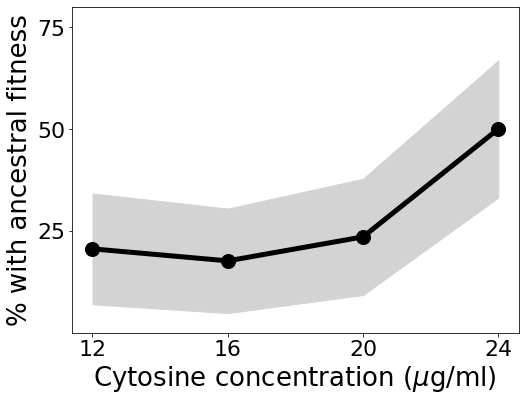

In [191]:
plt.figure(facecolor='white', figsize=(8,6))
color_dict_pval = {0.05:'darkgrey',
                   0.1:'dimgrey',
                   0.15:'black'}

#for pval in cutoffs:
    
plt.plot([0,1,2,3], [x/34*100 for x in [pass_12_raw, pass_16_raw, pass_20_raw, pass_24_raw]], color='k', marker='o', ms=14, lw=5)

fill_between_ymax = []
fill_between_ymin = []

for val in [pass_12_raw, pass_16_raw, pass_20_raw, pass_24_raw]:
    bound = get_conf_int_proportion(val, 34)
    fill_between_ymax.append(((val/34)+bound)*100)
    fill_between_ymin.append(((val/34)-bound)*100)
    
plt.fill_between([0,1,2,3], fill_between_ymax, fill_between_ymin, color='lightgrey')

    
plt.ylim(0,80)
plt.xticks([0, 1, 2, 3], ['12', '16', '20', '24'], fontsize=22)
plt.yticks([25,50,75], fontsize=22)

#plt.legend(['p>0.05', 'p>0.1', 'p>0.15'], loc='upper left', title='Threshold', fontsize=13,title_fontsize =13)

plt.xlabel('Cytosine concentration ($\mu$g/ml)', fontsize=26)
plt.ylabel('% with ancestral fitness', fontsize=26)

plt.savefig('./figures/fig_3_d.svg', format='svg', dpi=600)

In [192]:
# Not large-scale validations hits or false negs
# D155S/G76M, E64V/E69V, I156P/Y79E, T60R/M100W	

In [221]:
reorder = [37, 15, 6, 31, 5, 1, 2, 11, 26, 0, 12, 22, 21, 33, 3, 27, 23, 13, 18, 29, 7, 30, 16, 25, 4, 9, 14, 20, 8, 17, 10, 19, 34, 28, 24, 35, 36]
col_order = [list(allele_by_conc.columns)[x] for x in reorder]

xticks_labels = [r'$\Delta$/WT', 'E64S/M100W', 'D155S/M100W', 'M100W/R53I', 'D155S/G76M',
                   'A97F/M93G', 'D155A/M100W', 'E64C/M100W', 'I156P/M100W', 'A59H/M100W',
                   'E64C/R73G', 'E64V/R73G', 'E64V/M100W', 'T60R/M100W',
                   'D155A/R73G', 'I156P/R73G', 'E64V/Y79S', 'E64C/Y79S', 'E64V/E69V',
                   'M100W/H62C', 'D155S/R73G', 'M100W/R53D', 'E64S/R73G', 'F153*/M100W',
                   'D155A/Y79S', 'E64C/G72P', 'E64S/L74P', 'E64V/L74P', 'D155S/Y79S',
                   'E64S/Y79S', 'E64C/L74P', 'E64V/G72P', 'Y79S/H62C', 'I156P/Y79E',
                   'E69L/H62C', 'Y79S/L74P', r'$\Delta$/$\Delta$']
len(xticks_labels)

37

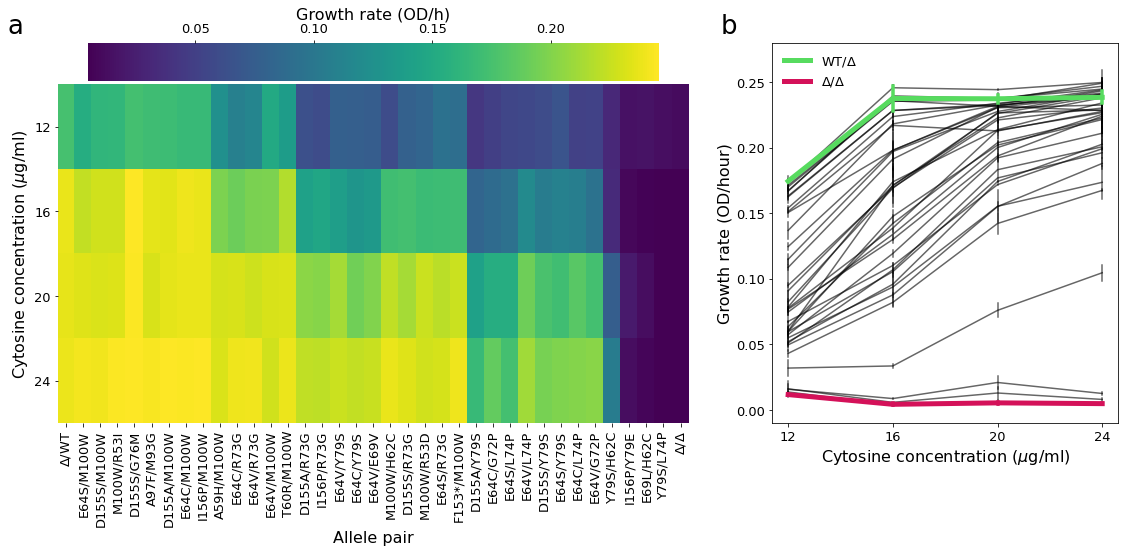

In [222]:
fig = plt.figure(figsize=(19,7))

gs = fig.add_gridspec(1, 15, hspace=0.8)


ax1 = fig.add_subplot(gs[0:1, 0:9])

g = sns.heatmap(allele_by_conc[col_order], robust=True, cmap='viridis', cbar_kws=dict(use_gridspec=False, location="top", label='Growth rate (OD/h)', fraction=0.1, aspect = 15, pad=0.01))
g.figure.axes[-1].xaxis.label.set_size(16)
cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=13)

plt.xlabel('Allele pair', fontsize=16)
plt.ylabel('Cytosine concentration ($\mu$g/ml)', fontsize=16)
plt.xticks([x+0.5 for x in range(0,37)], xticks_labels, fontsize=13)
plt.yticks(fontsize=13, rotation=0)







ax2 = fig.add_subplot(gs[0:1, 10:15])


wt = dose_rep_df[dose_rep_df['allele_pair'] == 'delta/wt']
delta = dose_rep_df[dose_rep_df['allele_pair'] == 'delta/delta']

pairs = dose_rep_df[~dose_rep_df['allele_pair'].isin(['delta/wt', 'delta/delta'])]

sns.lineplot(data=wt, x='cytosine_conc', y = 'growth_rate', markers=True, err_style="bars", color=mut_colors['WT-like'], lw=5, err_kws={'zorder':9, 'lw':3.5}, ci='sd')
sns.lineplot(data=delta, x='cytosine_conc', y = 'growth_rate', markers=True, err_style="bars", color=mut_colors['Nonsense-like'], lw=5, err_kws={'zorder':9, 'lw':3.5}, ci='sd')


for pair in list(pairs.allele_pair.unique()):
    sns.lineplot(data=pairs[pairs['allele_pair']==pair], x='cytosine_conc', y = 'growth_rate', markers=True, err_style="bars", color='k', alpha=0.6, zorder=0, ci='sd')

plt.xticks([12,16,20,24], ['12', '16', '20', '24'], fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(-0.01, 0.28)

plt.legend([r'WT/$\Delta$', r'$\Delta$/$\Delta$'],  loc='upper left', frameon=False, fontsize=13)


plt.xlabel('Cytosine concentration ($\mu$g/ml)', fontsize=16)
plt.ylabel('Growth rate (OD/hour)', fontsize=16)




plt.text(-0.08,1.15, 'a', fontsize=26, transform = ax1.transAxes)
plt.text(1.05,1.15, 'b', fontsize=26, transform = ax1.transAxes)

plt.savefig('./figures/figure5.svg', format='svg', dpi=300, bbox_inches='tight')

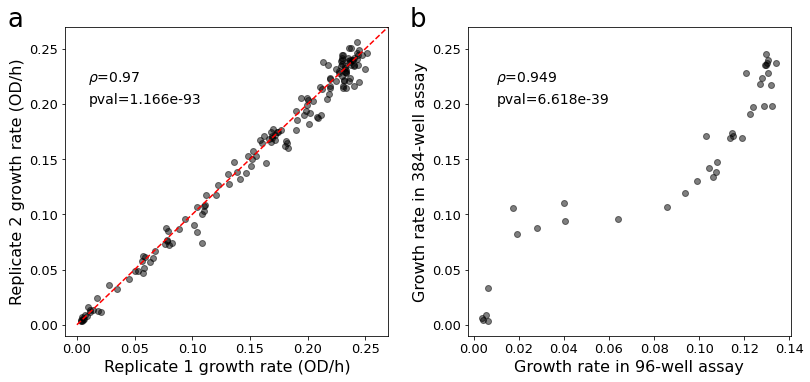

In [210]:
fig = plt.figure(figsize=(13,13))

gs = fig.add_gridspec(20, 20, hspace=0.8)

ax1 = fig.add_subplot(gs[0:9, 0:9])

plt.scatter(replicates[1], replicates[2], color='k', alpha=0.5)

plt.plot([0,0.3], [0,0.3], 'r--')

stats.pearsonr(replicates[1].dropna(), replicates[2].dropna())

plt.xlabel('Replicate 1 growth rate (OD/h)', fontsize=16)
plt.ylabel('Replicate 2 growth rate (OD/h)', fontsize=16)



vals = stats.spearmanr(replicates[1].dropna(), replicates[2].dropna())
plt.text(0.01,0.22, r'$\rho$='+str(np.round(vals[0], 3)), fontsize=14)
plt.text(0.01,0.20, 'pval='+str(np.format_float_scientific(vals[1],3)), fontsize=14)

plt.xlim(-0.01, 0.27)
plt.ylim(-0.01, 0.27)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

        
#########################################
ax2 = fig.add_subplot(gs[0:9, 11:20])

for pair in list(mean_val_pivot.index):
    
    if '_16' in pair:
        
        prev_val = list(dose_rep_array[(dose_rep_array['allele_pair']==pair.strip('_16')) & (dose_rep_array['rep']==1)]['growth_rate'])[0]
        #print(prev_val)
    
        plt.plot(prev_val, mean_val_pivot.at[pair, 'mean_val'], 'ko', alpha=0.5)
        
        prev_list.append(prev_val)
        dose_rep_list.append(mean_val_pivot.at[pair, 'mean_val'])
        
plt.xlabel('Growth rate in 96-well assay', fontsize=16)
plt.ylabel('Growth rate in 384-well assay', fontsize=16)

vals = stats.spearmanr(prev_list, dose_rep_list)
plt.text(0.01,0.22, r'$\rho$='+str(np.round(vals[0], 3)), fontsize=14)
plt.text(0.01,0.20, 'pval='+str(np.format_float_scientific(vals[1],3)), fontsize=14)

        
stats.spearmanr(prev_list, dose_rep_list)
plt.ylim(-0.01, 0.27)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

################################################

plt.text(-0.18,1.0, 'a', fontsize=26, transform = ax1.transAxes)
plt.text(-0.18,1.0, 'b', fontsize=26, transform = ax2.transAxes)


plt.savefig('./figures/doserep_sup.svg', format='svg', dpi=300, bbox_inches = 'tight')

## Double mutants crossed with either E64V or R73G

In [226]:
double_muts_array = pd.read_excel('./double_mut_nat_array_quadrant.xlsx')
double_muts_array['allele'] = double_muts_array['mut1'].astype(str) + '+' + double_muts_array['mut2'].astype(str)

double_muts_array


,row,col,pcr_pos,mut1,mut2,allele
0,A,1,A1,R53D,NaN,R53D+nan
1,B,1,B1,E64V,R53D,E64V+R53D
2,C,1,C1,H62C,R53D,H62C+R53D
3,D,1,D1,D155S,R53D,D155S+R53D
4,E,1,E1,R73G,R53D,R73G+R53D
...,...,...,...,...,...,...
72,C,11,F10,M100W,K27Q,M100W+K27Q
73,D,11,G10,M100W,K41V,M100W+K41V
74,E,11,H10,M100W,K117E,M100W+K117E
75,F,11,NaN,delta,NaN,delta+nan


In [227]:
double_muts_phen = pd.read_excel('./growth_curves/double_mutants_lofxlof_nat.xlsx', skiprows=[0,2]+[x for x in range(387,419)], index_col=0)
format_table(double_muts_phen)
double_muts_phen

,0.000000,0.250000,0.500000,0.749722,0.999722,1.249722,1.499722,1.749722,1.999722,2.249722,...,66.745833,66.995833,67.245833,67.495833,67.745833,67.995833,68.245833,68.495833,68.745833,68.995833
A1,0.093452,0.093411,0.093896,0.093926,0.093271,0.093289,0.093410,0.093110,0.093144,0.093032,...,0.092682,0.092765,0.092778,0.092766,0.092778,0.092789,0.092808,0.092792,0.092794,0.092796
A2,0.093867,0.093797,0.093697,0.093582,0.093484,0.093479,0.093523,0.093414,0.093471,0.093311,...,0.093384,0.093333,0.093368,0.093403,0.093357,0.093371,0.093341,0.093290,0.093307,0.093286
A3,0.095458,0.095100,0.094902,0.094696,0.094661,0.094998,0.094636,0.094559,0.094510,0.094851,...,0.094261,0.094082,0.094179,0.094088,0.094120,0.094159,0.094097,0.094081,0.094070,0.094143
A4,0.096947,0.095829,0.096586,0.095652,0.096477,0.095465,0.095677,0.095374,0.094848,0.095444,...,0.094635,0.094516,0.094574,0.094472,0.094600,0.094529,0.094416,0.094412,0.094463,0.094437
A5,0.093189,0.092910,0.092624,0.092456,0.092268,0.092291,0.092327,0.092207,0.092191,0.092115,...,0.092225,0.092071,0.092100,0.092083,0.092087,0.092118,0.092070,0.092036,0.092084,0.092102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P20,0.096203,0.096037,0.095953,0.095806,0.095620,0.095711,0.095772,0.095593,0.095381,0.095442,...,0.095301,0.095220,0.095365,0.095240,0.095224,0.095249,0.095250,0.095370,0.095224,0.095414
P21,0.096455,0.096352,0.096415,0.096202,0.095997,0.096117,0.096307,0.096036,0.095868,0.095938,...,0.095466,0.095436,0.095614,0.095547,0.095409,0.095394,0.095480,0.095662,0.095529,0.095707
P22,0.094149,0.093994,0.094015,0.093869,0.093587,0.093751,0.093796,0.093626,0.093532,0.093575,...,0.093317,0.093403,0.093396,0.093325,0.093418,0.093280,0.093356,0.093480,0.093319,0.093468
P23,0.094062,0.094009,0.093961,0.093871,0.093547,0.093813,0.093768,0.093517,0.093489,0.093516,...,0.093267,0.093241,0.093294,0.093328,0.093269,0.093316,0.093241,0.093374,0.093385,0.093514


In [232]:
#for row in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']:
#    for col in range(1, 25):
#        plt.plot(double_muts_phen.T[row+str(col)])
#    plt.xlim(0,40)
#    print(row)
#    plt.show()

In [233]:
double_muts_phen_crosses = pd.read_excel('./growth_curves/doubles_mutants_lofxlof_cross_e64_r73g.xlsx', skiprows=[0,2]+[x for x in range(387,419)], index_col=0)
format_table(double_muts_phen_crosses)
double_muts_phen_crosses

,0.000000,0.250000,0.500000,0.750000,0.999722,1.249722,1.499722,1.749722,1.999722,2.249722,...,64.996111,65.246111,65.496111,65.745833,65.995833,66.245833,66.495833,66.745833,66.995833,67.245833
A1,0.092604,0.092650,0.092592,0.092541,0.092462,0.092542,0.092512,0.092507,0.092486,0.092492,...,0.091929,0.091991,0.092057,0.091907,0.092055,0.092036,0.092022,0.091999,0.092017,0.092000
A2,0.093581,0.093455,0.093392,0.093390,0.093309,0.093418,0.093333,0.093381,0.093316,0.093303,...,0.092869,0.093016,0.092965,0.092842,0.092908,0.092911,0.092941,0.093013,0.092901,0.093018
A3,0.094868,0.094643,0.094844,0.094734,0.094583,0.094653,0.094544,0.094578,0.094457,0.094455,...,0.094355,0.094450,0.094441,0.094363,0.094451,0.094431,0.094460,0.094538,0.094353,0.094384
A4,0.094289,0.094363,0.094320,0.094262,0.094143,0.094271,0.094193,0.094237,0.094151,0.094140,...,0.093612,0.093649,0.093674,0.093591,0.093705,0.093504,0.093607,0.093643,0.093601,0.093671
A5,0.093425,0.093422,0.093374,0.093326,0.093189,0.093259,0.093186,0.093277,0.093202,0.093134,...,0.092661,0.092731,0.092735,0.092596,0.092708,0.092640,0.092685,0.092738,0.092658,0.092791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P20,0.094307,0.094630,0.094566,0.094237,0.094260,0.094257,0.094153,0.094184,0.094193,0.094107,...,0.096521,0.096250,0.096633,0.096638,0.096684,0.096583,0.096587,0.096568,0.096701,0.096725
P21,0.095192,0.095579,0.095465,0.095180,0.095152,0.095155,0.094926,0.095025,0.095040,0.095002,...,0.094378,0.094087,0.094362,0.094363,0.094377,0.094257,0.094314,0.094272,0.094454,0.094416
P22,0.095700,0.095916,0.095784,0.095522,0.095591,0.095543,0.095572,0.095585,0.095562,0.095458,...,0.095109,0.094580,0.094541,0.095145,0.094743,0.094672,0.094308,0.094537,0.094961,0.094686
P23,0.094054,0.094239,0.094157,0.093877,0.093827,0.093899,0.093770,0.093806,0.093679,0.093692,...,0.093447,0.093396,0.093399,0.093478,0.093445,0.093402,0.093385,0.093358,0.093465,0.093562


In [234]:
#for row in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']:
#    for col in range(1, 25):
#        plt.plot(double_muts_phen_crosses.T[row+str(col)])
#    plt.xlim(0,50)
#    print(row)
#    plt.show()

In [235]:
double_muts_array['FC_R1'], double_muts_array['FC_R2'], double_muts_array['CY_R1'], double_muts_array['CY_R2'] = np.nan, np.nan, np.nan, np.nan

change_coord = {'E17':'C17',
                'G17':'E17',
                'I17':'G17',
                'K17':'I17',
                'M17':'K17',
                'O17':'M17',
                'C17':'O17'}



for strain in double_muts_array.index:
    
    row = double_muts_array.loc[strain]['row']
    col = double_muts_array.loc[strain]['col']
    well = row+str(col)
    
    assay_well_list = get_384_wells_from_96(well)
    #print(assay_well_list)
    
    mod_list = [change_coord[x] if x in change_coord else x for x in assay_well_list]
    
    double_muts_array.at[strain, 'FC_R1'] = get_derivative_growth_rate(tuple([assay_well_list[0][0], int(assay_well_list[0][1:])]), double_muts_phen.T, tmax=40)[0]
    double_muts_array.at[strain, 'FC_R2'] = get_derivative_growth_rate(tuple([assay_well_list[1][0], int(assay_well_list[1][1:])]), double_muts_phen.T, tmax=40)[0]
    double_muts_array.at[strain, 'CY_R1'] = get_derivative_growth_rate(tuple([assay_well_list[2][0], int(assay_well_list[2][1:])]), double_muts_phen.T, tmax=40)[0]
    double_muts_array.at[strain, 'CY_R2'] = get_derivative_growth_rate(tuple([assay_well_list[3][0], int(assay_well_list[3][1:])]), double_muts_phen.T, tmax=40)[0]

double_muts_array    

,row,col,pcr_pos,mut1,mut2,allele,FC_R1,FC_R2,CY_R1,CY_R2
0,A,1,A1,R53D,NaN,R53D+nan,0.15796,0.15696,0.01116,0.011320
1,B,1,B1,E64V,R53D,E64V+R53D,0.16028,0.15552,0.00944,0.009000
2,C,1,C1,H62C,R53D,H62C+R53D,0.15824,0.15676,0.01140,0.011040
3,D,1,D1,D155S,R53D,D155S+R53D,0.16000,0.15404,0.01480,0.015360
4,E,1,E1,R73G,R53D,R73G+R53D,0.15580,0.15396,0.01232,0.008880
...,...,...,...,...,...,...,...,...,...,...
72,C,11,F10,M100W,K27Q,M100W+K27Q,0.12932,0.12844,0.01200,0.010000
73,D,11,G10,M100W,K41V,M100W+K41V,0.13032,0.12924,0.00948,0.008960
74,E,11,H10,M100W,K117E,M100W+K117E,0.12320,0.12532,0.01068,0.009400
75,F,11,NaN,delta,NaN,delta+nan,0.15388,0.15060,0.01816,0.014400


In [236]:
double_muts_array['E64V_R1'], double_muts_array['E64V_R2'], double_muts_array['R73G_R1'], double_muts_array['R73G_R2'] = np.NaN, np.NaN, np.NaN, np.NaN


for strain in double_muts_array.index:
    
    row = double_muts_array.loc[strain]['row']
    col = double_muts_array.loc[strain]['col']
    well = row+str(col)
    
    assay_well_list = get_384_wells_from_96(well)
    #print(assay_well_list)
    
    double_muts_array.at[strain, 'E64V_R1'] = get_derivative_growth_rate(tuple([assay_well_list[0][0], int(assay_well_list[0][1:])]), double_muts_phen_crosses.T, tmax=40)[0]
    double_muts_array.at[strain, 'E64V_R2'] = get_derivative_growth_rate(tuple([assay_well_list[1][0], int(assay_well_list[1][1:])]), double_muts_phen_crosses.T, tmax=40)[0]
    double_muts_array.at[strain, 'R73G_R1'] = get_derivative_growth_rate(tuple([assay_well_list[2][0], int(assay_well_list[2][1:])]), double_muts_phen_crosses.T, tmax=40)[0]
    double_muts_array.at[strain, 'R73G_R2'] = get_derivative_growth_rate(tuple([assay_well_list[3][0], int(assay_well_list[3][1:])]), double_muts_phen_crosses.T, tmax=40)[0]

double_muts_array    

,row,col,pcr_pos,mut1,mut2,allele,FC_R1,FC_R2,CY_R1,CY_R2,E64V_R1,E64V_R2,R73G_R1,R73G_R2
0,A,1,A1,R53D,NaN,R53D+nan,0.15796,0.15696,0.01116,0.011320,0.00564,0.00532,0.01608,0.012720
1,B,1,B1,E64V,R53D,E64V+R53D,0.16028,0.15552,0.00944,0.009000,0.00312,0.00336,0.11560,0.128000
2,C,1,C1,H62C,R53D,H62C+R53D,0.15824,0.15676,0.01140,0.011040,0.00364,0.00564,0.00368,0.005000
3,D,1,D1,D155S,R53D,D155S+R53D,0.16000,0.15404,0.01480,0.015360,0.00480,0.00316,0.00672,0.005840
4,E,1,E1,R73G,R53D,R73G+R53D,0.15580,0.15396,0.01232,0.008880,0.00788,0.00316,0.00636,0.009920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,C,11,F10,M100W,K27Q,M100W+K27Q,0.12932,0.12844,0.01200,0.010000,0.20908,0.20824,0.00512,0.004480
73,D,11,G10,M100W,K41V,M100W+K41V,0.13032,0.12924,0.00948,0.008960,0.21544,0.20792,0.00424,0.003200
74,E,11,H10,M100W,K117E,M100W+K117E,0.12320,0.12532,0.01068,0.009400,0.21844,0.21528,0.00636,0.005920
75,F,11,NaN,delta,NaN,delta+nan,0.15388,0.15060,0.01816,0.014400,0.00424,0.00208,0.00232,0.002120


In [237]:
double_muts_array['FC_rate'] = (double_muts_array['FC_R1']+double_muts_array['FC_R2'])/2
double_muts_array['CY_rate'] = (double_muts_array['CY_R1']+double_muts_array['CY_R2'])/2

In [238]:
double_muts_array['E64V_rate'] = (double_muts_array['E64V_R1']+double_muts_array['E64V_R2'])/2
double_muts_array['R73G_rate'] = (double_muts_array['R73G_R1']+double_muts_array['R73G_R2'])/2

In [239]:
double_muts_array['mut1'].dropna(inplace=True)
double_muts_array = double_muts_array[double_muts_array['pcr_pos']!='empty'].copy(deep=True)
double_muts_array

,row,col,pcr_pos,mut1,mut2,allele,FC_R1,FC_R2,CY_R1,CY_R2,E64V_R1,E64V_R2,R73G_R1,R73G_R2,FC_rate,CY_rate,E64V_rate,R73G_rate
0,A,1,A1,R53D,NaN,R53D+nan,0.15796,0.15696,0.01116,0.01132,0.00564,0.00532,0.01608,0.01272,0.15746,0.01124,0.00548,0.01440
1,B,1,B1,E64V,R53D,E64V+R53D,0.16028,0.15552,0.00944,0.00900,0.00312,0.00336,0.11560,0.12800,0.15790,0.00922,0.00324,0.12180
2,C,1,C1,H62C,R53D,H62C+R53D,0.15824,0.15676,0.01140,0.01104,0.00364,0.00564,0.00368,0.00500,0.15750,0.01122,0.00464,0.00434
3,D,1,D1,D155S,R53D,D155S+R53D,0.16000,0.15404,0.01480,0.01536,0.00480,0.00316,0.00672,0.00584,0.15702,0.01508,0.00398,0.00628
4,E,1,E1,R73G,R53D,R73G+R53D,0.15580,0.15396,0.01232,0.00888,0.00788,0.00316,0.00636,0.00992,0.15488,0.01060,0.00552,0.00814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,B,11,E10,M100W,L24Q,M100W+L24Q,0.12824,0.12900,0.01276,0.01236,0.21124,0.20372,0.00460,0.00584,0.12862,0.01256,0.20748,0.00522
72,C,11,F10,M100W,K27Q,M100W+K27Q,0.12932,0.12844,0.01200,0.01000,0.20908,0.20824,0.00512,0.00448,0.12888,0.01100,0.20866,0.00480
73,D,11,G10,M100W,K41V,M100W+K41V,0.13032,0.12924,0.00948,0.00896,0.21544,0.20792,0.00424,0.00320,0.12978,0.00922,0.21168,0.00372
74,E,11,H10,M100W,K117E,M100W+K117E,0.12320,0.12532,0.01068,0.00940,0.21844,0.21528,0.00636,0.00592,0.12426,0.01004,0.21686,0.00614


In [241]:
double_muts_array[double_muts_array['CY_R2']-double_muts_array['CY_R1'] >0.03]
# One of the strains shows unhabitual deviation between replicates

,row,col,pcr_pos,mut1,mut2,allele,FC_R1,FC_R2,CY_R1,CY_R2,E64V_R1,E64V_R2,R73G_R1,R73G_R2,FC_rate,CY_rate,E64V_rate,R73G_rate
40,F,6,C6,H62C,NaN,H62C+nan,0.15776,0.15172,0.0128,0.08188,0.00532,0.0032,0.147,0.14812,0.15474,0.04734,0.00426,0.14756


In [ ]:
print(get_384_wells_from_96('F6'))
plt.plot(double_muts_phen.T['M13'])
plt.plot(double_muts_phen.T['M12'])
# probably a contamination or spontatenous mutant. Will drop the strain.

In [242]:
double_muts_array[abs(double_muts_array['R73G_R1']-double_muts_array['R73G_R2']) >0.03]


,row,col,pcr_pos,mut1,mut2,allele,FC_R1,FC_R2,CY_R1,CY_R2,E64V_R1,E64V_R2,R73G_R1,R73G_R2,FC_rate,CY_rate,E64V_rate,R73G_rate
7,A,2,H1,M100W,R53D,M100W+R53D,0.15912,0.15520,0.00928,0.00864,0.00784,0.00500,0.00824,0.08796,0.15716,0.00896,0.00642,0.04810
48,G,7,E7,R73G,Y79S,R73G+Y79S,0.15416,0.15276,0.01956,0.02108,0.03936,0.03416,0.08480,0.00324,0.15346,0.02032,0.03676,0.04402
53,E,8,C8,H62C,M100W,H62C+M100W,0.15320,0.15828,0.01680,0.01116,0.00612,0.00264,0.10224,0.00356,0.15574,0.01398,0.00438,0.05290


['B4', 'B5', 'C4', 'C5']


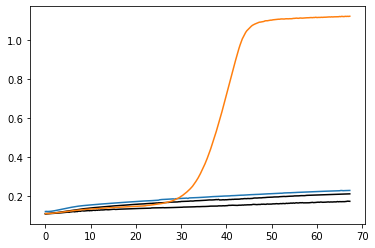

In [243]:
print(get_384_wells_from_96('A2'))
plt.plot(double_muts_phen_crosses.T['B4'], 'k')
plt.plot(double_muts_phen_crosses.T['B5'], 'k')
plt.plot(double_muts_phen_crosses.T['C4'])
plt.plot(double_muts_phen_crosses.T['C5'])
# other probable contaminations

['N14', 'N15', 'O14', 'O15']


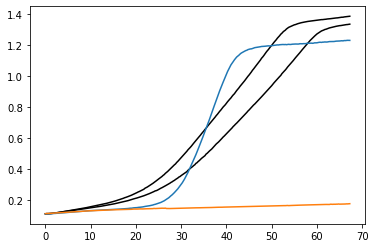

In [244]:
print(get_384_wells_from_96('G7'))
plt.plot(double_muts_phen_crosses.T['N14'], 'k')
plt.plot(double_muts_phen_crosses.T['N15'], 'k')
plt.plot(double_muts_phen_crosses.T['O14'])
plt.plot(double_muts_phen_crosses.T['O15'])
# other probable contaminations

['J16', 'J17', 'K16', 'K17']


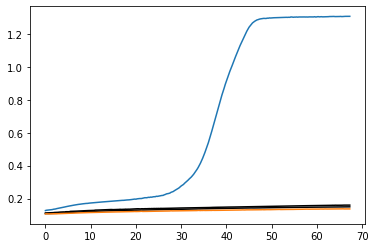

In [245]:
print(get_384_wells_from_96('E8'))
plt.plot(double_muts_phen_crosses.T['J16'], 'k')
plt.plot(double_muts_phen_crosses.T['J17'], 'k')
plt.plot(double_muts_phen_crosses.T['K16'])
plt.plot(double_muts_phen_crosses.T['K17'])
# other probable contaminations

In [247]:
double_muts_array.at[40, 'CY_rate'] = np.NaN

double_muts_array.at[7, 'R73G_rate'] = np.NaN
double_muts_array.at[48, 'R73G_rate'] = np.NaN
double_muts_array.at[53, 'R73G_rate'] = np.NaN
# drop other probable contaminations

In [248]:
double_muts_array.loc[40]

row                 F
col                 6
pcr_pos            C6
mut1             H62C
mut2              NaN
allele       H62C+nan
FC_R1         0.15776
FC_R2         0.15172
CY_R1          0.0128
CY_R2         0.08188
E64V_R1       0.00532
E64V_R2        0.0032
R73G_R1         0.147
R73G_R2       0.14812
FC_rate       0.15474
CY_rate           NaN
E64V_rate     0.00426
R73G_rate     0.14756
Name: 40, dtype: object

In [249]:
double_muts_array

,row,col,pcr_pos,mut1,mut2,allele,FC_R1,FC_R2,CY_R1,CY_R2,E64V_R1,E64V_R2,R73G_R1,R73G_R2,FC_rate,CY_rate,E64V_rate,R73G_rate
0,A,1,A1,R53D,NaN,R53D+nan,0.15796,0.15696,0.01116,0.01132,0.00564,0.00532,0.01608,0.01272,0.15746,0.01124,0.00548,0.01440
1,B,1,B1,E64V,R53D,E64V+R53D,0.16028,0.15552,0.00944,0.00900,0.00312,0.00336,0.11560,0.12800,0.15790,0.00922,0.00324,0.12180
2,C,1,C1,H62C,R53D,H62C+R53D,0.15824,0.15676,0.01140,0.01104,0.00364,0.00564,0.00368,0.00500,0.15750,0.01122,0.00464,0.00434
3,D,1,D1,D155S,R53D,D155S+R53D,0.16000,0.15404,0.01480,0.01536,0.00480,0.00316,0.00672,0.00584,0.15702,0.01508,0.00398,0.00628
4,E,1,E1,R73G,R53D,R73G+R53D,0.15580,0.15396,0.01232,0.00888,0.00788,0.00316,0.00636,0.00992,0.15488,0.01060,0.00552,0.00814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,B,11,E10,M100W,L24Q,M100W+L24Q,0.12824,0.12900,0.01276,0.01236,0.21124,0.20372,0.00460,0.00584,0.12862,0.01256,0.20748,0.00522
72,C,11,F10,M100W,K27Q,M100W+K27Q,0.12932,0.12844,0.01200,0.01000,0.20908,0.20824,0.00512,0.00448,0.12888,0.01100,0.20866,0.00480
73,D,11,G10,M100W,K41V,M100W+K41V,0.13032,0.12924,0.00948,0.00896,0.21544,0.20792,0.00424,0.00320,0.12978,0.00922,0.21168,0.00372
74,E,11,H10,M100W,K117E,M100W+K117E,0.12320,0.12532,0.01068,0.00940,0.21844,0.21528,0.00636,0.00592,0.12426,0.01004,0.21686,0.00614


In [254]:
double_muts_array[double_muts_array['allele']=='nan+nan']

,row,col,pcr_pos,mut1,mut2,allele,FC_R1,FC_R2,CY_R1,CY_R2,E64V_R1,E64V_R2,R73G_R1,R73G_R2,FC_rate,CY_rate,E64V_rate,R73G_rate
31,D,5,B5,NaN,NaN,nan+nan,0.15512,0.15528,0.01368,0.01376,0.00316,0.00264,0.00204,0.00220,0.15520,0.01372,0.00290,0.00212
54,F,8,D8,NaN,NaN,nan+nan,0.14816,0.14996,0.01476,0.02344,0.00560,0.00256,0.00420,0.00176,0.14906,0.01910,0.00408,0.00298


In [255]:
double_muts_array.drop(index=[31,54], inplace=True)
# drop empty wells

In [256]:
double_muts_array[double_muts_array['mut1']=='C94D']

,row,col,pcr_pos,mut1,mut2,allele,FC_R1,FC_R2,CY_R1,CY_R2,E64V_R1,E64V_R2,R73G_R1,R73G_R2,FC_rate,CY_rate,E64V_rate,R73G_rate
39,E,6,B6,C94D,NaN,C94D+nan,0.15504,0.15288,0.01148,0.01128,0.00736,0.00252,0.00376,0.0034,0.15396,0.01138,0.00494,0.00358


In [257]:
double_muts_array.drop(index=39, inplace=True)
#drop contaminated strain (phenotype inconsistent with other maeasurements and previous DMS assay)

In [258]:
len(double_muts_array['allele'].unique())

66

## Collapse values from same genotypes

In [265]:

dict_of_dict_double_mut = {}


allele_id = 0


for allele in double_muts_array['allele'].unique():
    
    
    allele_id+=1
    
    allele_dict = {}
    
    if list(double_muts_array['allele']).count(allele)>=2:
        
        print(double_muts_array[double_muts_array['allele']==allele])
    
    #print(allele, list(double_muts_array['allele']).count(allele))
    
#make     

   row  col pcr_pos  mut1 mut2    allele    FC_R1    FC_R2    CY_R1    CY_R2  \
0    A    1      A1  R53D  NaN  R53D+nan  0.15796  0.15696  0.01116  0.01132   
37   C    6      A6  R53D  NaN  R53D+nan  0.15336  0.15332  0.01880  0.01820   

    E64V_R1  E64V_R2  R73G_R1  R73G_R2  FC_rate  CY_rate  E64V_rate  R73G_rate  
0   0.00564  0.00532  0.01608  0.01272  0.15746  0.01124    0.00548    0.01440  
37  0.00600  0.00220  0.00596  0.00312  0.15334  0.01850    0.00410    0.00454  
   row  col pcr_pos  mut1 mut2    allele    FC_R1    FC_R2    CY_R1    CY_R2  \
9    C    2      B2  H62C  NaN  H62C+nan  0.16320  0.15616  0.01896  0.01292   
40   F    6      C6  H62C  NaN  H62C+nan  0.15776  0.15172  0.01280  0.08188   

    E64V_R1  E64V_R2  R73G_R1  R73G_R2  FC_rate  CY_rate  E64V_rate  R73G_rate  
9   0.01368  0.00236   0.1404  0.14132  0.15968  0.01594    0.00802    0.14086  
40  0.00532  0.00320   0.1470  0.14812  0.15474      NaN    0.00426    0.14756  
   row  col pcr_pos  mut1 mut2  

In [266]:
R53D_nan_corr_val_FC = np.mean(double_muts_array[double_muts_array['allele']=='R53D+nan']['FC_rate'])
R53D_nan_corr_val_CY = np.mean(double_muts_array[double_muts_array['allele']=='R53D+nan']['CY_rate'])
R53D_nan_corr_val_FC, R53D_nan_corr_val_CY

(0.15539999999999987, 0.014870000000000022)

In [267]:
H62C_nan_corr_val_FC = np.mean(double_muts_array[double_muts_array['allele']=='H62C+nan']['FC_rate'])
H62C_nan_corr_val_CY = np.mean(double_muts_array[double_muts_array['allele']=='H62C+nan']['CY_rate'])
H62C_nan_corr_val_FC, H62C_nan_corr_val_CY

(0.15721000000000007, 0.01594000000000001)

In [268]:
E64V_nan_corr_val_FC = np.mean(double_muts_array[double_muts_array['allele']=='E64V+nan']['FC_rate'])
E64V_nan_corr_val_CY = np.mean(double_muts_array[double_muts_array['allele']=='E64V+nan']['CY_rate'])
E64V_nan_corr_val_FC, E64V_nan_corr_val_CY

(0.15940999999999994, 0.020589999999999997)

In [269]:
D155S_nan_corr_val_FC = np.mean(double_muts_array[double_muts_array['allele']=='D155S+nan']['FC_rate'])
D155S_nan_corr_val_CY = np.mean(double_muts_array[double_muts_array['allele']=='D155S+nan']['CY_rate'])
D155S_nan_corr_val_FC, D155S_nan_corr_val_CY

(0.15220999999999985, 0.015619999999999995)

In [270]:
R73G_nan_corr_val_FC = np.mean(double_muts_array[double_muts_array['allele']=='R73G+nan']['FC_rate'])
R73G_nan_corr_val_CY = np.mean(double_muts_array[double_muts_array['allele']=='R73G+nan']['CY_rate'])
R73G_nan_corr_val_FC, R73G_nan_corr_val_CY

(0.12373333333333325, 0.015519999999999997)

In [271]:
double_muts_array.at[0, 'FC_rate'] = R53D_nan_corr_val_FC
double_muts_array.at[0, 'CY_rate'] = R53D_nan_corr_val_CY

double_muts_array.drop(index=37, inplace=True)

double_muts_array.at[9, 'FC_rate'] = H62C_nan_corr_val_FC
double_muts_array.at[9, 'CY_rate'] = H62C_nan_corr_val_CY

double_muts_array.drop(index=40, inplace=True)


double_muts_array.at[16, 'FC_rate'] = E64V_nan_corr_val_FC
double_muts_array.at[16, 'CY_rate'] = E64V_nan_corr_val_CY

double_muts_array.drop(index=17, inplace=True)


double_muts_array.at[25, 'FC_rate'] = D155S_nan_corr_val_FC
double_muts_array.at[25, 'CY_rate'] = D155S_nan_corr_val_CY

double_muts_array.drop(index=41, inplace=True)


double_muts_array.at[33, 'FC_rate'] = R73G_nan_corr_val_FC
double_muts_array.at[33, 'CY_rate'] = R73G_nan_corr_val_CY

double_muts_array.drop(index=[34,42], inplace=True)



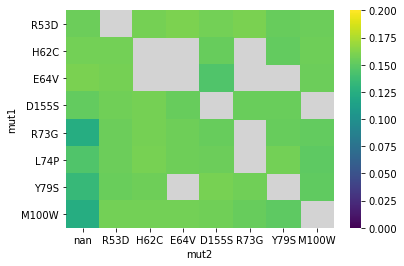

In [273]:
row_order=['R53D', 'H62C', 'E64V',  'D155S', 'R73G', 'L74P', 'Y79S', 'M100W']
col_order=[np.NaN, 'R53D', 'H62C', 'E64V', 'D155S', 'R73G', 'Y79S', 'M100W']


double_mut_FC_df = double_muts_array.pivot(index='mut1', columns='mut2', values='FC_rate')
double_mut_CY_df = double_muts_array.pivot(index='mut1', columns='mut2', values='CY_rate')

ax = sns.heatmap(double_mut_FC_df.loc[row_order][col_order], vmin=0, vmax=0.2, cmap='viridis')
ax.set_facecolor('lightgrey')

In [274]:
ctrl_muts_double = double_muts_array[(double_muts_array['mut2'].isna()==True)&(double_muts_array['mut1'].isin(['L24Q', 'K41V', 'K27Q', 'K117E'])==True)]
ctrl_muts_double

,row,col,pcr_pos,mut1,mut2,allele,FC_R1,FC_R2,CY_R1,CY_R2,E64V_R1,E64V_R2,R73G_R1,R73G_R2,FC_rate,CY_rate,E64V_rate,R73G_rate
59,D,9,A9,L24Q,NaN,L24Q+nan,0.03488,0.01984,0.19708,0.19092,0.23444,0.22052,0.22696,0.22092,0.02736,0.19400,0.22748,0.22394
60,E,9,B9,K27Q,NaN,K27Q+nan,0.03796,0.02132,0.19388,0.19468,0.21472,0.20872,0.22880,0.22508,0.02964,0.19428,0.21172,0.22694
61,F,9,C9,K41V,NaN,K41V+nan,0.03980,0.03660,0.19456,0.19168,0.21844,0.21016,0.22932,0.22900,0.03820,0.19312,0.21430,0.22916
62,G,9,D9,K117E,NaN,K117E+nan,0.02976,0.03144,0.19528,0.19360,0.20904,0.20280,0.21652,0.20516,0.03060,0.19444,0.20592,0.21084


In [276]:
fitness_ctrl_haploid = np.mean(ctrl_muts_double['CY_rate'])
fitness_ctrl_diploid = np.mean(list(ctrl_muts_double['E64V_rate'])+ list(ctrl_muts_double['R73G_rate']))
fitness_ctrl_haploid, fitness_ctrl_diploid

(0.19396000000000002, 0.2187875000000001)

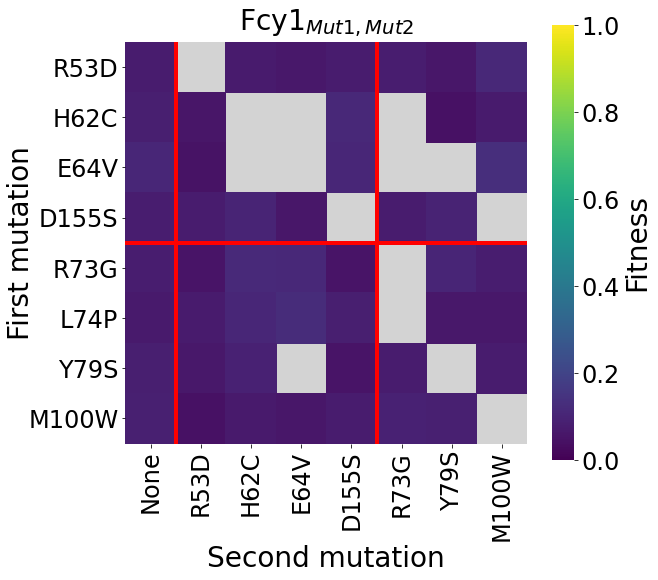

In [277]:
plt.figure(figsize=(9,8))

g = sns.heatmap(double_mut_CY_df.loc[row_order][col_order]/fitness_ctrl_haploid,
                vmin=0, vmax=1, robust=True, cmap='viridis',cbar_kws={'label':'Fitness'}, square =True)
g.figure.axes[-1].yaxis.label.set_size(28)
g.figure.axes[-1].tick_params(labelsize=24)

plt.ylabel("First mutation", fontsize=28, labelpad=-7)
plt.xlabel("Second mutation", fontsize=28)
plt.yticks(rotation=0, fontsize=24)
plt.xticks(rotation=90, fontsize=24, ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5], labels=['None', 'R53D', 'H62C', 'E64V', 'D155S', 'R73G', 'Y79S', 'M100W'])


g.set_facecolor('lightgrey')
plt.axvline(1, color='red', lw=4)
plt.axvline(5, color='red', lw=4)
plt.axhline(4, color='red', lw=4)

plt.title(r'Fcy1$_{Mut1,Mut2}$', fontsize=28, pad=12)

plt.savefig('./figures/fig3_panel_e_1.svg', format='svg', dpi=600)

In [278]:
double_muts_array.mut2.unique()

array([nan, 'R53D', 'H62C', 'E64V', 'D155S', 'R73G', 'Y79S', 'M100W',
       'L24Q', 'K27Q', 'K41V', 'K117E'], dtype=object)

In [279]:
double_mut_E64V_df = double_muts_array.pivot(index='mut1', columns='mut2', values='E64V_rate')
double_mut_R73G_df = double_muts_array.pivot(index='mut1', columns='mut2', values='R73G_rate')

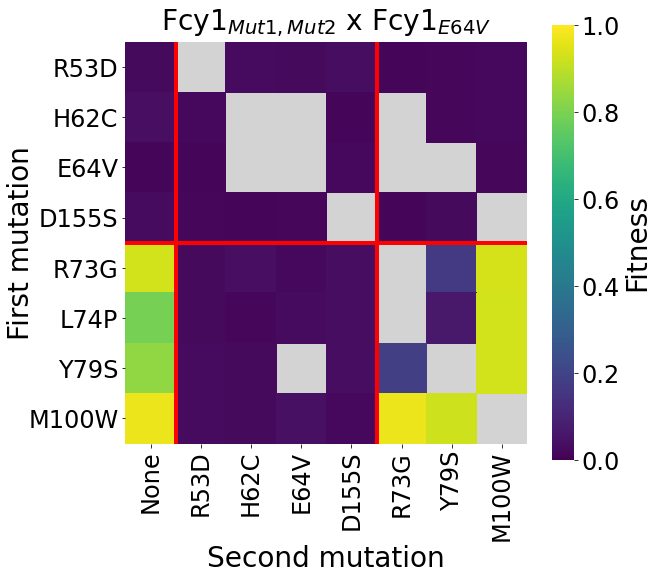

In [280]:
plt.figure(figsize=(9,8))

g = sns.heatmap(double_mut_E64V_df.loc[row_order][col_order]/fitness_ctrl_diploid, 
                vmin=0, vmax=1, cmap='viridis',cbar_kws={'label':'Fitness'}, square =True)
g.figure.axes[-1].yaxis.label.set_size(28)
g.figure.axes[-1].tick_params(labelsize=24)

plt.ylabel("First mutation", fontsize=28, labelpad=-7)
plt.xlabel("Second mutation", fontsize=28)
plt.yticks(rotation=0, fontsize=24)
plt.xticks(rotation=90, fontsize=24, ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5], labels=['None', 'R53D', 'H62C', 'E64V', 'D155S', 'R73G', 'Y79S', 'M100W'])


g.set_facecolor('lightgrey')
plt.axvline(1, color='red', lw=4)
plt.axvline(5, color='red', lw=4)
plt.axhline(4, color='red', lw=4)


plt.title(r'Fcy1$_{Mut1,Mut2}$ x Fcy1$_{E64V}$', fontsize=28, pad=12)

plt.savefig('./figures/fig3_panel_e_2.svg', format='svg', dpi=600)

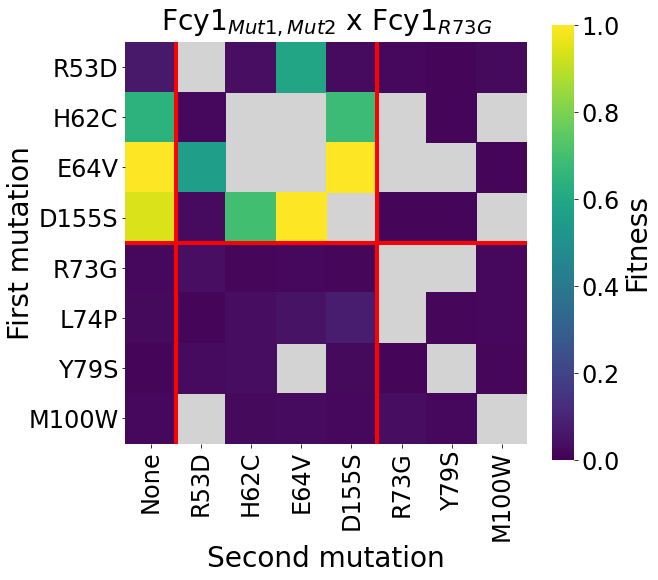

In [281]:
plt.figure(figsize=(9,8))

g = sns.heatmap(double_mut_R73G_df.loc[row_order][col_order]/fitness_ctrl_diploid, vmin=0, vmax=1, cmap='viridis',
                cbar_kws={'label':'Fitness'}, square =True)
g.figure.axes[-1].yaxis.label.set_size(28)
g.figure.axes[-1].tick_params(labelsize=24)

plt.ylabel("First mutation", fontsize=28, labelpad=-7)
plt.xlabel("Second mutation", fontsize=28)
plt.yticks(rotation=0, fontsize=24)
plt.xticks(rotation=90, fontsize=24, ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5], labels=['None', 'R53D', 'H62C', 'E64V', 'D155S', 'R73G', 'Y79S', 'M100W'])


g.set_facecolor('lightgrey')
plt.axvline(1, color='red', lw=4)
plt.axvline(5, color='red', lw=4)
plt.axhline(4, color='red', lw=4)


plt.title(r'Fcy1$_{Mut1,Mut2}$ x Fcy1$_{R73G}$', fontsize=28, pad=12)
plt.savefig('./figures/fig3_panel_e_3.svg', format='svg', dpi=600)

In [282]:
double_mut_E64V_df.loc[row_order][col_order]

mut2,NaN,R53D,H62C,E64V,D155S,R73G,Y79S,M100W
mut1,,,,,,,,
R53D,0.00548,NaN,0.00634,0.00578,0.00708,0.00326,0.00354,0.00428
H62C,0.00802,0.00464,NaN,NaN,0.00304,NaN,0.00360,0.00438
E64V,0.00274,0.00324,NaN,NaN,0.00444,NaN,NaN,0.00366
D155S,0.00674,0.00398,0.00296,0.00392,NaN,0.00304,0.00536,NaN
R73G,0.20342,0.00552,0.00782,0.00464,0.00690,NaN,0.03676,0.20508
L74P,0.17282,0.00594,0.00358,0.00638,0.00700,NaN,0.01396,0.20364
Y79S,0.18222,0.00654,0.00560,NaN,0.00730,0.04040,NaN,0.20424
M100W,0.21252,0.00642,0.00558,0.00912,0.00472,0.21260,0.20206,NaN


## Haploid growth curves with duplicates in LP

In [287]:
lp_induction_df =  pd.read_excel('./growth_curves/e64v_r73g_LP_haploides.xlsx', skiprows=[0,2]+[x for x in range(99,133)], index_col=0)

format_table(lp_induction_df)

lp_induction_df

,0.000000,0.250000,0.500000,0.749722,0.999722,1.249722,1.499722,1.749722,1.999722,2.249722,...,64.245833,64.495833,64.745833,64.995833,65.245833,65.495833,65.745833,65.995833,66.245833,66.495833
A1,0.12798,0.15228,0.16197,0.17449,0.18616,0.20240,0.21651,0.23384,0.25660,0.27914,...,1.22380,1.21130,1.19740,1.18540,1.17240,1.1634,1.15150,1.14010,1.13100,1.12210
A2,0.13068,0.16089,0.17600,0.18623,0.20426,0.22014,0.23295,0.24809,0.27003,0.29236,...,1.33040,1.33130,1.33130,1.33160,1.33110,1.3327,1.33240,1.33160,1.33220,1.33270
A3,0.13347,0.16338,0.17652,0.18981,0.20778,0.22474,0.23934,0.25421,0.27570,0.29931,...,1.49850,1.49890,1.49930,1.49960,1.49920,1.5001,1.50030,1.50060,1.50100,1.50110
A4,0.13050,0.15437,0.16780,0.18218,0.19448,0.20984,0.22425,0.24023,0.26179,0.28621,...,1.48730,1.48760,1.48780,1.48850,1.48760,1.4885,1.48840,1.48860,1.48900,1.48900
A5,0.13440,0.15865,0.17668,0.18816,0.20278,0.21491,0.23071,0.24418,0.26296,0.28349,...,1.39710,1.39680,1.39760,1.39870,1.39820,1.3993,1.39980,1.39950,1.40050,1.40080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H8,0.19903,0.21284,0.21895,0.23093,0.24340,0.25820,0.26872,0.28646,0.30456,0.32147,...,1.48320,1.48310,1.48360,1.48330,1.48270,1.4836,1.48390,1.48380,1.48420,1.48420
H9,0.19179,0.20564,0.21773,0.23260,0.24851,0.26312,0.27839,0.29410,0.31428,0.33436,...,1.50570,1.50600,1.50620,1.50630,1.50560,1.5062,1.50640,1.50650,1.50650,1.50710
H10,0.18849,0.20343,0.21864,0.23140,0.24291,0.25292,0.26895,0.28605,0.30115,0.31942,...,1.51580,1.51640,1.51700,1.51670,1.51680,1.5170,1.51710,1.51760,1.51780,1.51820
H11,0.19036,0.20661,0.21934,0.23094,0.24063,0.25521,0.27014,0.28726,0.30204,0.31578,...,1.51080,1.51150,1.51200,1.51170,1.51150,1.5117,1.51150,1.51230,1.51270,1.51220


In [288]:
def get_AUC(well, df, t_end = 50):
    
    df_indexes = [ x for x in list(df.index) if x<=t_end]
    
    #print(well)
    
    df_data = df.loc[df_indexes]
    data = df_data[well]
       
    x_vals = list(data.index)
    y_vals = [data.loc[x] for x in list(data.index)]
    
    auc = np.trapz(y_vals, x=x_vals)
    
    return auc

In [291]:
estradiol_conc_dict = {'A': 0,
                       'B': 4.5,
                       'C': 6,
                       'D': 16,
                       'E': 0,
                       'F': 4.5,
                       'G': 6,
                       'H': 16}

lp_dict_of_dict = {}


for well in lp_induction_df.index:
    
    sub_dict = {}
    
    
    row, col = well[0], int(well[1:])
    
    if col in range(1,4):
        sub_dict['strain']='LP-E64V/delta'
    elif col in range(4, 7):
        sub_dict['strain']='LP-R73G/delta'
    elif col in range(7, 10):
        sub_dict['strain']='LP-E64V/R73G'
    elif col in range(10, 13):
        sub_dict['strain']='LP-R73G/E64V'
   # assign strain for each columns of the plate     
        
    sub_dict['rep'] = ((col+2)%3)+1
    # overly complicated way to get to rep 1, 2 ,3 in the proper locations
    
    sub_dict['estradiol'] = estradiol_conc_dict[row]
    # add estradiol concentration
    
    if row in ['A', 'B', 'C', 'D']:
        sub_dict['media'] = 'SC-L'
        
    if row in ['E', 'F', 'G', 'H']:
        sub_dict['media'] = 'SC-UL+CY'
        
    
    sub_dict['growth_rate'] = get_derivative_growth_rate((row,col), lp_induction_df.T, tmax=60)[0]
    sub_dict['AUC'] = get_AUC(well, lp_induction_df.T)
    
    lp_dict_of_dict[well] = sub_dict
        
#print(lp_dict_of_dict)
    
LP_rates_df = pd.DataFrame.from_dict(lp_dict_of_dict, orient='index')
LP_rates_df['log2_AUC'] = np.log2(LP_rates_df['AUC'])

LP_rates_df
    
    
    
    

,strain,rep,estradiol,media,growth_rate,AUC,log2_AUC
A1,LP-E64V/delta,1,0.0,SC-L,0.15408,64.156204,6.003517
A2,LP-E64V/delta,2,0.0,SC-L,0.15508,57.349587,5.841711
A3,LP-E64V/delta,3,0.0,SC-L,0.14908,65.089439,6.024352
A4,LP-R73G/delta,1,0.0,SC-L,0.15016,64.347917,6.007822
A5,LP-R73G/delta,2,0.0,SC-L,0.15032,59.828824,5.902769
...,...,...,...,...,...,...,...
H8,LP-E64V/R73G,2,16.0,SC-UL+CY,0.11436,62.077703,5.956003
H9,LP-E64V/R73G,3,16.0,SC-UL+CY,0.11788,63.325965,5.984725
H10,LP-R73G/E64V,1,16.0,SC-UL+CY,0.12116,63.148896,5.980686
H11,LP-R73G/E64V,2,16.0,SC-UL+CY,0.11632,62.867619,5.974245


In [293]:
x_val_ctrl=[]
x_err_ctrl=[]
# LP-E64V, R73G in SC-L

y_val_ctrl=[]
y_err_ctrl=[]
# LP-R73G, E64V in SC-L

x_val_cy=[]
x_err_cy=[]
# LP-E64V, R73G in SC-UL+CY

y_val_cy=[]
y_err_cy=[]
# LP-R73G, E64V in SC-UL+CY


for estradiol_conc in [0, 4.5,6,16]:
    
    x_val_ctrl.append(np.mean(LP_rates_df[(LP_rates_df['media']=='SC-L')&(LP_rates_df['strain']=='LP-E64V/R73G')&(LP_rates_df['estradiol']==estradiol_conc)]['log2_AUC']))
    x_err_ctrl.append(np.std(LP_rates_df[(LP_rates_df['media']=='SC-L')&(LP_rates_df['strain']=='LP-E64V/R73G')&(LP_rates_df['estradiol']==estradiol_conc)]['log2_AUC']))
    
    y_val_ctrl.append(np.mean(LP_rates_df[(LP_rates_df['media']=='SC-L')&(LP_rates_df['strain']=='LP-R73G/E64V')&(LP_rates_df['estradiol']==estradiol_conc)]['log2_AUC']))
    y_err_ctrl.append(np.std(LP_rates_df[(LP_rates_df['media']=='SC-L')&(LP_rates_df['strain']=='LP-R73G/E64V')&(LP_rates_df['estradiol']==estradiol_conc)]['log2_AUC']))
    
    
    x_val_cy.append(np.mean(LP_rates_df[(LP_rates_df['media']=='SC-UL+CY')&(LP_rates_df['strain']=='LP-E64V/R73G')&(LP_rates_df['estradiol']==estradiol_conc)]['log2_AUC']))
    x_err_cy.append(np.std(LP_rates_df[(LP_rates_df['media']=='SC-UL+CY')&(LP_rates_df['strain']=='LP-E64V/R73G')&(LP_rates_df['estradiol']==estradiol_conc)]['log2_AUC']))
    
    y_val_cy.append(np.mean(LP_rates_df[(LP_rates_df['media']=='SC-UL+CY')&(LP_rates_df['strain']=='LP-R73G/E64V')&(LP_rates_df['estradiol']==estradiol_conc)]['log2_AUC']))
    y_err_cy.append(np.std(LP_rates_df[(LP_rates_df['media']=='SC-UL+CY')&(LP_rates_df['strain']=='LP-R73G/E64V')&(LP_rates_df['estradiol']==estradiol_conc)]['log2_AUC']))
    
    

    
    

In [294]:
lp_palette = sns.color_palette('magma', 4)

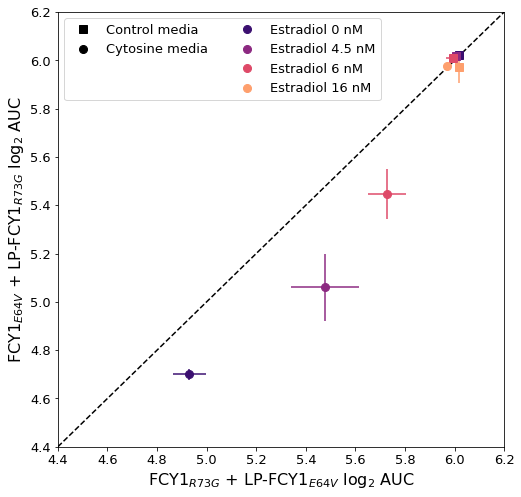

In [296]:
plt.figure(figsize=(8,8))


for pos in range(0,4):

    plt.errorbar(x=x_val_ctrl[pos], y=y_val_ctrl[pos], xerr=x_err_ctrl[pos], yerr=y_err_ctrl[pos], marker='s', linestyle='none', color=lp_palette[pos], ms=8)
    

for pos in range(0,4):

    plt.errorbar(x=x_val_cy[pos], y=y_val_cy[pos], xerr=x_err_cy[pos], yerr=y_err_cy[pos], marker='o', linestyle='none', color=lp_palette[pos], ms=8)
    
    

plt.xlim(4.4, 6.2)
plt.ylim(4.4, 6.2)
plt.plot(np.linspace(4.4,6.2,100), np.linspace(4.4,6.2,100), 'k--')

plt.xlabel('FCY1$_{R73G}$ + LP-FCY1$_{E64V}$ log$_{2}$ AUC', fontsize=16)
plt.ylabel('FCY1$_{E64V}$ + LP-FCY1$_{R73G}$ log$_{2}$ AUC', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


legend_elements = [Line2D([0], [0], color='k', label='Control media', linestyle='none', marker='s', ms=8),
                   Line2D([0], [0], color='k', label='Cytosine media', linestyle='none', marker='o', ms=8),
                   Line2D([0], [0], color='white', label='', linestyle='none', marker='s'),
                   Line2D([0], [0], color='white', label='', linestyle='none', marker='s'),
                   Line2D([0], [0], color=lp_palette[0], label='Estradiol 0 nM', linestyle='none', marker='o', ms=8),
                   Line2D([0], [0], color=lp_palette[1], label='Estradiol 4.5 nM', linestyle='none', marker='o', ms=8),
                   Line2D([0], [0], color=lp_palette[2], label='Estradiol 6 nM', linestyle='none', marker='o', ms=8),
                   Line2D([0], [0], color=lp_palette[3], label='Estradiol 16 nM', linestyle='none', marker='o', ms=8)]




plt.legend(handles = legend_elements, ncol=2, fontsize=13)

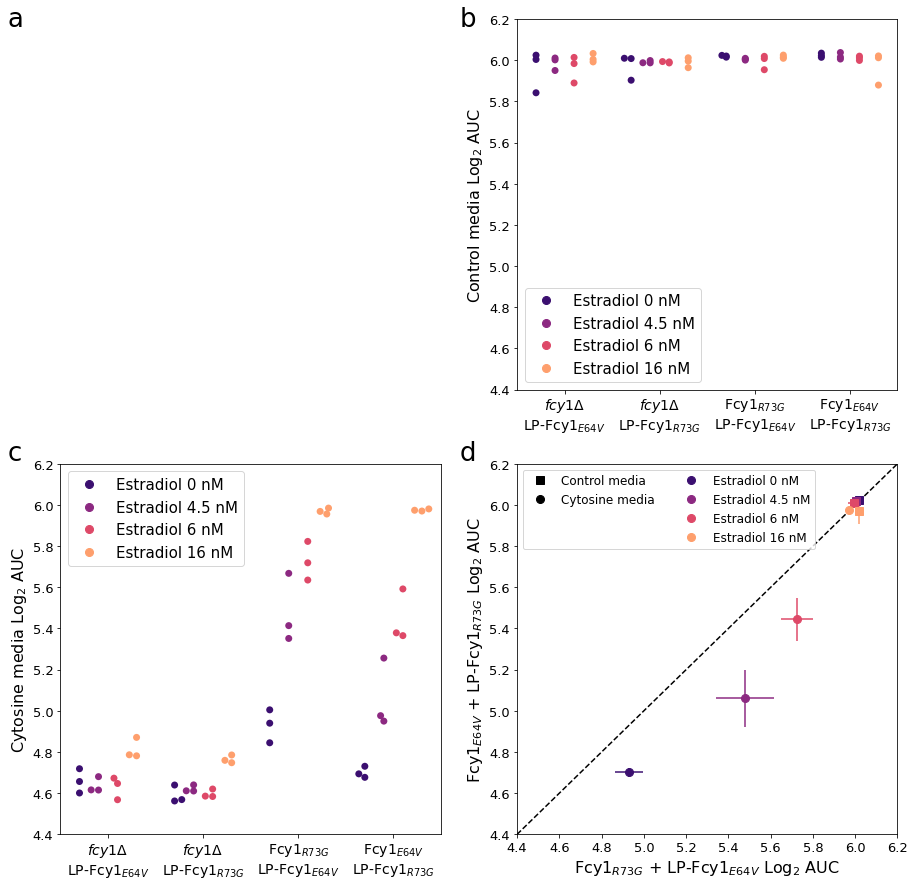

In [297]:
plt.figure(figsize=(15,15))

ax1 = plt.subplot(221)
plt.axis('off')

ax2 = plt.subplot(222)
g = sns.swarmplot(data=LP_rates_df[LP_rates_df['media']=='SC-L'], x="strain", y="log2_AUC", 
                  hue="estradiol", palette='magma', dodge=True, s=7, )
plt.ylim(4.4,6.2)
ax2.set_xlabel('')
plt.xticks([0, 1, 2, 3], ['$\it{fcy1\Delta}$\nLP-Fcy1$_{E64V}$', '$\it{fcy1\Delta}$\nLP-Fcy1$_{R73G}$', 'Fcy1$_{R73G}$\nLP-Fcy1$_{E64V}$', 'Fcy1$_{E64V}$\nLP-Fcy1$_{R73G}$'], fontsize=14)
plt.ylabel('Control media Log$_{2}$ AUC', fontsize=16)
plt.yticks(fontsize=13)


legend_elements = [Line2D([0], [0], color=lp_palette[0], label='Estradiol 0 nM', linestyle='none', marker='o', ms=8),
                   Line2D([0], [0], color=lp_palette[1], label='Estradiol 4.5 nM', linestyle='none', marker='o', ms=8),
                   Line2D([0], [0], color=lp_palette[2], label='Estradiol 6 nM', linestyle='none', marker='o', ms=8),
                   Line2D([0], [0], color=lp_palette[3], label='Estradiol 16 nM', linestyle='none', marker='o', ms=8)]

plt.legend(handles = legend_elements, ncol=1, fontsize=15)



ax3 = plt.subplot(223)

g = sns.swarmplot(data=LP_rates_df[LP_rates_df['media']=='SC-UL+CY'], x="strain", y="log2_AUC", 
                  hue="estradiol", palette='magma', dodge=True, s=7)
plt.ylim(4.4,6.2)
ax3.set_xlabel('')
plt.xticks([0, 1, 2, 3], ['$\it{fcy1\Delta}$\nLP-Fcy1$_{E64V}$', '$\it{fcy1\Delta}$\nLP-Fcy1$_{R73G}$', 'Fcy1$_{R73G}$\nLP-Fcy1$_{E64V}$', 'Fcy1$_{E64V}$\nLP-Fcy1$_{R73G}$'], fontsize=14)
plt.ylabel('Cytosine media Log$_{2}$ AUC', fontsize=16)
plt.yticks(fontsize=13)


legend_elements = [Line2D([0], [0], color=lp_palette[0], label='Estradiol 0 nM', linestyle='none', marker='o', ms=8),
                   Line2D([0], [0], color=lp_palette[1], label='Estradiol 4.5 nM', linestyle='none', marker='o', ms=8),
                   Line2D([0], [0], color=lp_palette[2], label='Estradiol 6 nM', linestyle='none', marker='o', ms=8),
                   Line2D([0], [0], color=lp_palette[3], label='Estradiol 16 nM', linestyle='none', marker='o', ms=8)]

plt.legend(handles = legend_elements, ncol=1, fontsize=15, loc='upper left')


plt.subplot(224)

for pos in range(0,4):

    plt.errorbar(x=x_val_ctrl[pos], y=y_val_ctrl[pos], xerr=x_err_ctrl[pos], yerr=y_err_ctrl[pos], marker='s', linestyle='none', color=lp_palette[pos], ms=8)
    

for pos in range(0,4):

    plt.errorbar(x=x_val_cy[pos], y=y_val_cy[pos], xerr=x_err_cy[pos], yerr=y_err_cy[pos], marker='o', linestyle='none', color=lp_palette[pos], ms=8)
    
    

plt.xlim(4.4, 6.2)
plt.ylim(4.4, 6.2)
plt.plot(np.linspace(4.4,6.2,100), np.linspace(4.4,6.2,100), 'k--')

plt.xlabel('Fcy1$_{R73G}$ + LP-Fcy1$_{E64V}$ Log$_{2}$ AUC', fontsize=16)
plt.ylabel('Fcy1$_{E64V}$ + LP-Fcy1$_{R73G}$ Log$_{2}$ AUC', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


legend_elements = [Line2D([0], [0], color='k', label='Control media', linestyle='none', marker='s', ms=8),
                   Line2D([0], [0], color='k', label='Cytosine media', linestyle='none', marker='o', ms=8),
                   Line2D([0], [0], color='white', label='', linestyle='none', marker='s'),
                   Line2D([0], [0], color='white', label='', linestyle='none', marker='s'),
                   Line2D([0], [0], color=lp_palette[0], label='Estradiol 0 nM', linestyle='none', marker='o', ms=8),
                   Line2D([0], [0], color=lp_palette[1], label='Estradiol 4.5 nM', linestyle='none', marker='o', ms=8),
                   Line2D([0], [0], color=lp_palette[2], label='Estradiol 6 nM', linestyle='none', marker='o', ms=8),
                   Line2D([0], [0], color=lp_palette[3], label='Estradiol 16 nM', linestyle='none', marker='o', ms=8)]

plt.legend(handles = legend_elements, ncol=2, fontsize=12)

plt.text(-0.14,0.98, 'a', fontsize=26, transform = ax1.transAxes)
plt.text(1.05,0.98, 'b', fontsize=26, transform = ax1.transAxes)
plt.text(-0.14,-0.19, 'c', fontsize=26, transform = ax1.transAxes)
plt.text(1.05,-0.19, 'd', fontsize=26, transform = ax1.transAxes)


plt.savefig('./figures/landing_pad.svg', format='svg', dpi=600)